In [ ]:
import pandas as pd

# Load the uploaded Excel file
file_path = '/content/drive/MyDrive/books_rating_ver.xlsx'
book_df = pd.read_excel(file_path)

# Display the first few rows to understand its structure
book_df.head()


순위                          도서명                      저자명   출판사    출판년도  \
0   1  나미야 잡화점의 기적 :히가시노 게이고 장편소설   지은이: 히가시노 게이고 ;옮긴이: 양윤옥  현대문학  2012.0   
1   2             7년의 밤 :정유정 장편소설                  지은이: 정유정  은행나무  2011.0   
2   3           엄마를 부탁해 :신경숙 장편소설                  지은이: 신경숙    창비  2008.0   
3   4             (趙廷來 大河小說) 太白山脈                   저자: 조정래    해냄  2002.0   
4   5                채식주의자:한강 연작소설                       한강    창비  2007.0   

            ISBN           주제분류명    대출건수  \
0  9788972756194  문학 > 일본문학 > 소설  303786   
1  9788956604992  문학 > 한국문학 > 소설  224137   
2  9788936433673  문학 > 한국문학 > 소설  222714   
3  9788973374113  문학 > 한국문학 > 소설  221692   
4  9788936433598  문학 > 한국문학 > 소설  196139   

                                                  단어  \
0  편지, 히가시노, 나미야 잡화점의 기적, 사람, 고민, 기적, 잡화점, 나미, 감동...   
1    서원, 승환, 세령호, 아들, 아버지, 보기이, 서사, 내 심장을 쏴라, 재앙, 7년   
2           엄마, 어머니, 사랑, 자식, 신경숙, 내면, 존재, 인생, 실종, 기억   
3                                                NaN   
4  영혜, 채식주의자, 몽고반점, 내 여자의 열매, 나무 불꽃, 욕망, 남편, 한강, ...   

                                  가중치  ...      마니아 ISBN2  \
0     13, 12, 12, 9, 8, 8, 7, 7, 6, 6  ...  9788979197846   
1  20, 15, 14, 13, 12, 11, 9, 9, 9, 9  ...  9788956602998   
2     43, 32, 11, 9, 9, 8, 8, 8, 7, 7  ...  9788932014289   
3                                 NaN  ...  9788973374137   
4  40, 37, 18, 15, 12, 10, 9, 8, 8, 8  ...  9788936436575   

                  마니아 도서명3            마니아 저자명3 마니아 출판사3  마니아 출판년도3  \
0                용의자 X의 헌신  히가시노 게이고 지음;양억관 옮김     현대문학       2006   
1  28 (리커버 특별판) - 정유정 장편소설           정유정 (지은이)     은행나무       2020   
2     바이올렛=신경숙 장편소설/Violet              신경숙 지음     문학동네       2001   
3          (趙廷來 大河小說) 太白山脈             저자: 조정래       해냄       2002   
4      바람이 분다, 가라 :한강 장편소설                  한강   문학과지성사       2010   

       마니아 ISBN3          검색용 도서명            결과 도서명   평점  0점체크  
0  9788972753698      나미야 잡화점의 기적  나미야 잡화점의 기적 (양장)  9.1   NaN  
1  9791191071108            7년의 밤             7년의 밤  8.9   NaN  
2  9788982814167          엄마를 부탁해           엄마를 부탁해  9.2   NaN  
3  9788973374106  (趙廷來 大河小說) 太白山脈            태백산맥 1  9.4   NaN  
4  9788932020006            채식주의자     채식주의자 (리마스터판)  8.3   NaN  

[5 rows x 29 columns]

In [ ]:
book_df = book_df.dropna(subset=['단어'])


In [ ]:
book_df['단어'] = book_df['단어'].str.strip()


In [ ]:
stop_words = set(['의', '이', '에', '가', '을', '는', '와', '과'])  # 예시 불용어 리스트
book_df['단어'] = book_df['단어'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


In [ ]:
# 결측치가 있는 행들을 확인
missing_rows = book_df[book_df['단어'].isna()]

# Display the rows with missing values in "단어" column
missing_rows


순위                     도서명                       저자명       출판사  \
3        4        (趙廷來 大河小說) 太白山脈                    저자: 조정래        해냄   
79      80      세상에서 가장 높은 산 위의 집        세자르 카네 글·그림 ;이정주 옮김       비룡소   
217    218                흥쟁이 고두홍               이수용 글 ;지문 그림    좋은책어린이   
224    225               사슴아 내 형제야         간자와 도시코 글 ;이선아 옮김     보림출판사   
330    331                  올드 베어          케빈 행크스 지음 ;석승환 번역       마루벌   
367    368            이웃 :김성미 그림책                        김성미      책읽는곰   
741    742               슈니츨러 작품선   지은이: 아르투어 슈니츨러 ;옮긴이: 신동화       민음사   
815    816                 기억 전달자           로이스 로리 글 ;장은수 옮김       비룡소   
1294  1295  별 :프로방스 지방 어느 목동의 이야기      글쓴이: 알퐁스 도데 ;옮긴이: 이시내     길벗어린이   
1357  1358                      토지                     朴景利 저      나남출판   
1387  1388                나쁜 어린이 표            글: 황선미;그림: 권사우     웅진씽크빅   
1566  1567           우리 강아지는 발레리나            안나 켐프 글 ;박소연 옮김        달리   
1699  1700  사서함 110호의 우편물:이도우 장편소설                       이도우  랜덤하우스코리아   
1726  1727                      토지                     朴景利 저      나남출판   
1732  1733             오늘의 10번 타자               문은아 글 ;정현 그림     웅진씽크빅   
1739  1740            내가 만든 특급 열차           노부미 글·그림 ;우지영 옮김      책읽는곰   
1856  1857                   어린 왕자            생텍쥐페리 지음;김숙 그림     가나출판사   

        출판년도           ISBN            주제분류명    대출건수   단어  가중치  ...  \
3     2002.0  9788973374113   문학 > 한국문학 > 소설  221692  NaN  NaN  ...   
79    2024.0  9788949110004  문학 > 프랑스문학 > 소설  100643  NaN  NaN  ...   
217   2022.0  9788959772087   문학 > 한국문학 > 소설   72157  NaN  NaN  ...   
224   2010.0  9788943302177   문학 > 일본문학 > 소설   71558  NaN  NaN  ...   
330   2010.0  9788985675420   문학 > 영미문학 > 소설   61533  NaN  NaN  ...   
367   2024.0  9788993242300   문학 > 한국문학 > 소설   59185  NaN  NaN  ...   
741   2024.0  9788937460005   문학 > 독일문학 > 소설   43531  NaN  NaN  ...   
815   2024.0  9788949120539   문학 > 영미문학 > 소설   41628  NaN  NaN  ...   
1294  2010.0  9788986621938  문학 > 프랑스문학 > 소설   34269  NaN  NaN  ...   
1357  2002.0  9788930007016   문학 > 한국문학 > 소설   33541  NaN  NaN  ...   
1387  2006.0  9788901028514   문학 > 한국문학 > 소설   33171  NaN  NaN  ...   
1566  2010.0  9788990364524   문학 > 영미문학 > 소설   31200  NaN  NaN  ...   
1699  2007.0  9788925513218   문학 > 한국문학 > 소설   29814  NaN  NaN  ...   
1726  2002.0  9788930007016   문학 > 한국문학 > 소설   29581  NaN  NaN  ...   
1732  2019.0  9788901038636   문학 > 한국문학 > 소설   29476  NaN  NaN  ...   
1739  2011.0  9788996017035   문학 > 일본문학 > 소설   29407  NaN  NaN  ...   
1856  2003.0  9788957361955  문학 > 프랑스문학 > 소설   28516  NaN  NaN  ...   

          마니아 ISBN2                  마니아 도서명3                 마니아 저자명3  \
3     9788973374137           (趙廷來 大河小說) 太白山脈                  저자: 조정래   
79    9788943302511  마젤과 슐리마젤 :행운의 요정과 불행의 요정    아이작 바셰비스 싱어 글 ;이미영 옮김   
217   9788968300127                  작은북이 동동동            송재찬 글 ;한수진 그림   
224   9788965131137                  나무는 변신쟁이    나가사와 마사코 글·그림 ;권남희 옮김   
330   9788984280144              서서 걷는 악어 우뚝이      레오 리오니 글·그림 ;엄혜숙 옮김   
367   9788987504322          사자도 꼼짝 못하는 우리 엄마          글: 천미진 ;그림: 고원주   
741   9788932403304                        구원  지은이: 자크 스트라우스 ;옮긴이: 서창렬   
815   9788996575504          독립명랑소녀 :김혜정 장편소설                 지은이: 김혜정   
1294  9788958284819    (밤티 마을)큰돌이네 집:이금이 장편동화            이금이 지음;양상용 그림   
1357  9788930007030                        토지                    朴景利 저   
1387  9788901058436                  초대받은 아이들             황선미 글;김진이 그림   
1566  9788911125814              동물원 몸무게 재는 날          글: 케이타로 ;옮김: 김숙   
1699  9788974282257          발칙한 연애 :김은정 장편소설                 지은이: 김은정   
1726  9788930007030                        토지                    朴景利 저   
1732  9791187153009                감당 못 할 전학생             심순 글 ;하수정 그림   
1739  9788997357628             내 고양이의 새로운 소식       질 바슐레 글·그림 ;나선희 옮김   
1856  9788957361900        의사 어벤저스 :어린이 의학 동화          글: 고희정 ;그림: 조승연   

           마니아 출판사3  마니아 출판년도3      마니아 ISBN3            검색용 도서

In [ ]:
# "단어" 열에 결측치가 존재하는 행 제거
book_df_cleaned = book_df.dropna(subset=['단어'])

# 결과 확인
book_df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1983 entries, 0 to 1999
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   순위         1983 non-null   int64  
 1   도서명        1983 non-null   object 
 2   저자명        1983 non-null   object 
 3   출판사        1983 non-null   object 
 4   출판년도       1856 non-null   float64
 5   ISBN       1983 non-null   int64  
 6   주제분류명      1983 non-null   object 
 7   대출건수       1983 non-null   int64  
 8   단어         1983 non-null   object 
 9   가중치        1983 non-null   object 
 10  마니아 도서명1   1983 non-null   object 
 11  마니아 저자명1   1983 non-null   object 
 12  마니아 출판사1   1983 non-null   object 
 13  마니아 출판년도1  1852 non-null   object 
 14  마니아 ISBN1  1983 non-null   int64  
 15  마니아 도서명2   1983 non-null   object 
 16  마니아 저자명2   1983 non-null   object 
 17  마니아 출판사2   1983 non-null   object 
 18  마니아 출판년도2  1852 non-null   object 
 19  마니아 ISBN2  1983 non-null   int64  
 20  마니아 도서명3   19

In [ ]:


# Check the number of missing values in the "단어" column
missing_count = book_df_cleaned['단어'].isna().sum()

missing_count


0

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

# BERT 모델과 토크나이저 로드
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertModel.from_pretrained('bert-base-multilingual-cased')

# 데이터프레임에서 단어 열 가져오기
keywords = book_df_cleaned['단어'].tolist()

# 임베딩을 구하는 함수 정의
def get_bert_embeddings(text_list):
    embeddings = []
    for text in text_list:
        # BERT 토큰화
        inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
        # BERT 모델을 통해 임베딩 생성
        outputs = model(**inputs)
        # 배치의 평균 임베딩 벡터 계산
        embedding = outputs.last_hidden_state.mean(dim=1).detach().numpy()
        embeddings.append(embedding.flatten())
    return embeddings

# 키워드의 임베딩 구하기
embeddings = get_bert_embeddings(keywords)

# 결과를 DataFrame으로 변환
import pandas as pd
embeddings_df = pd.DataFrame(embeddings)

# 임베딩 데이터프레임 확인
embeddings_df.head()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

0         1         2         3         4         5         6    \
0 -0.384808 -0.322508  0.415102  0.129492  0.219443  0.359496 -0.175366   
1 -0.279162 -0.220972  0.007412  0.041428 -0.048562  0.180284 -0.271483   
2 -0.448999 -0.355613  0.613196  0.293175  0.263118  0.883587 -0.452603   
3 -0.222390 -0.256164 -0.024056  0.127154  0.281465  0.281449 -0.289678   
4 -0.094771 -0.537084  0.116874  0.386515  0.151906  0.024171 -0.107696   

        7         8         9    ...       758       759       760       761  \
0  0.011166 -0.149237  0.291058  ... -0.541245  0.021222 -0.184070 -0.976153   
1  0.007639  0.114769  0.074845  ... -0.300016  0.417417 -0.138920 -0.822335   
2  0.108798 -0.065926  0.603482  ... -0.709018 -0.054810 -0.458500 -0.812052   
3 -0.250817  0.187769  0.476231  ... -0.030211  0.264387 -0.112343 -0.942452   
4  0.019041  0.045515  0.755084  ... -0.239661  0.479085 -0.666041 -1.250661   

        762       763       764       765       766       767  
0  0.470697 -0.020395  0.226277  0.330941  0.441122  0.328318  
1  0.538661  0.117796  0.345813  0.538276  0.293869  0.246649  
2  0.339701  0.096251  0.062677  0.752323  0.566348  0.192715  
3  0.356917  0.192324  0.569424  0.640575  0.238336  0.256933  
4  0.009201  0.087061  0.621756  0.914458  0.392174  0.194605  

[5 rows x 768 columns]

In [ ]:
# "단어" 열에 몇 개의 행이 있는지 확인하는 코드
num_keywords = book_df_cleaned['단어'].shape[0]

num_keywords


981

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
import pandas as pd

# BERT 모델과 토크나이저 로드
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertModel.from_pretrained('bert-base-multilingual-cased')

# 데이터프레임에서 "단어" 열 가져오기
keywords = book_df_cleaned['단어'].tolist()

# 임베딩을 구하는 함수 정의
def get_bert_embeddings(text_list):
    embeddings = []
    for text in text_list:
        # BERT 토큰화
        inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
        # BERT 모델을 통해 임베딩 생성
        with torch.no_grad():  # 불필요한 그래디언트 계산 방지
            outputs = model(**inputs)
        # 배치의 평균 임베딩 벡터 계산
        embedding = outputs.last_hidden_state.mean(dim=1).detach().numpy()
        embeddings.append(embedding.flatten())
    return embeddings

# 키워드의 임베딩 구하기
embeddings = get_bert_embeddings(keywords)

# 결과를 DataFrame으로 변환
embeddings_df = pd.DataFrame(embeddings)

# 임베딩 데이터프레임 저장 또는 확인
embeddings_df.head()


0         1         2         3         4         5         6    \
0 -0.384808 -0.322508  0.415102  0.129492  0.219443  0.359496 -0.175366   
1 -0.279162 -0.220972  0.007412  0.041428 -0.048562  0.180284 -0.271483   
2 -0.448999 -0.355613  0.613196  0.293175  0.263118  0.883587 -0.452603   
3 -0.222390 -0.256164 -0.024056  0.127154  0.281465  0.281449 -0.289678   
4 -0.094771 -0.537084  0.116874  0.386515  0.151906  0.024171 -0.107696   

        7         8         9    ...       758       759       760       761  \
0  0.011166 -0.149237  0.291058  ... -0.541245  0.021222 -0.184070 -0.976153   
1  0.007639  0.114769  0.074845  ... -0.300016  0.417417 -0.138920 -0.822335   
2  0.108798 -0.065926  0.603482  ... -0.709018 -0.054810 -0.458500 -0.812052   
3 -0.250817  0.187769  0.476231  ... -0.030211  0.264387 -0.112343 -0.942452   
4  0.019041  0.045515  0.755084  ... -0.239661  0.479085 -0.666041 -1.250661   

        762       763       764       765       766       767  
0  0.470697 -0.020395  0.226277  0.330941  0.441122  0.328318  
1  0.538661  0.117796  0.345813  0.538276  0.293869  0.246649  
2  0.339701  0.096251  0.062677  0.752323  0.566348  0.192715  
3  0.356917  0.192324  0.569424  0.640575  0.238336  0.256933  
4  0.009201  0.087061  0.621756  0.914458  0.392174  0.194605  

[5 rows x 768 columns]

In [ ]:
# 임베딩 데이터프레임을 CSV 파일로 저장
embeddings_df.to_csv('embeddings.csv', index=False)


#영화

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load the uploaded CSV file to check its contents
movie_data_path = '/content/drive/MyDrive/영화 키워드 최종본_kobert_240818.csv'
movie_df = pd.read_csv(movie_data_path)

# Display the first few rows to understand the structure
movie_df.head()


번호          제목     평점     관람 등급                                 장르  \
0  12654  1990년 자유부인  10.00  청소년 관람불가                  ['드라마', '멜로/로맨스']   
1  10994     19번째 남자   7.58  청소년 관람불가           ['코미디', '드라마', '멜로/로맨스']   
2  10727      48시간 2   7.68  청소년 관람불가  ['범죄', '액션', '드라마', '코미디', '스릴러']   
3  10630      7월 4일생   9.07   15세 관람가                      ['전쟁', '드라마']   
4  10926  90 벌레먹은 장미   0.00  청소년 관람불가                            ['드라마']   

       감독                             출연진  \
0     박재호           ['고두심', '강석우', '김흥기']   
1    론 쉘톤  ['케빈 코스트너', '수잔 서랜든', '팀 로빈스']   
2    월터 힐               ['에디 머피', '닉 놀테']   
3  올리버 스톤                       ['톰 크루즈']   
4     노세한                  ['남성훈', '김희아']   

                                                 줄거리  \
0  권위적인 남편 태연(김흥기 분)과의 사이에 딸 슬아를 둔 선영(고두심 분)은 권태롭...   
1  마이너 리그팀 중의 하나로 캐롤라이나 리그에서 허덕이던 더럼 불즈팀이 오랫동안 기대...   
2  형사 잭(Jack Cates: 닉 놀테 분)은 범죄단 두목 아이스맨을 추적하다 번번...   
3  건실한 청년 론(Ron Kovic: 톰 크루즈 분)은 고교시절 레슬링 선수로 땀 흘...   
4  대학시절 남자에게 배신당한 정희는 30세가 되도록 남자들의 사랑을 불신하며 독신으로...   

                                      processed_text  \
0  권위 남편 권태 일상 경영 친구 이혼녀 부탁 취재 여행 삼류 사진 작가 취재 동행 ...   
1  리그 오랫동안 기대 신인 투수 영입 한마디 두뇌 콘트롤 강속구 군림 구단 포수 영입...   
2  형사 범죄 두목 추적 허탕 인명 손실 혐의 위기 직면 체포 운명 출감 그이 사건 해...   
3  청년 고교 시절 레슬링 선수 고통 스파르타 훈련 신체 정신 학교 방문 병모 집소 하...   
4  대학 시절 남자 배신 남자 사랑 불신 독신 이혼 산부인과 의사 구애 결혼 남편 생활...   

                                            keywords  
0  ['행동', '파티', '친구', '취재', '충동', '창립', '작가', '자유...  
1  ['휴지', '현역', '해약', '한마디', '포수', '콘트롤', '코치', '...  
2  ['흔적', '형사', '혐의', '허탕', '해결', '출감', '추적', '체포...  
3  ['휠체어', '회의', '현실', '행정부', '한창', '하사관', '폭음', ...  
4  ['흔적', '후배', '충격', '증오', '죄의식', '종말', '존재', '자...

In [ ]:
# "키워드" 열에서 빈 값 또는 NaN 값을 가진 행을 삭제
movie_df_cleaned = movie_df.dropna(subset=['keywords'])

# 키워드가 빈 문자열인 행도 제거
movie_df_cleaned = movie_df_cleaned[movie_df_cleaned['keywords'].str.strip() != '']

# 결과 확인
movie_df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14296 entries, 0 to 14295
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   번호              14296 non-null  int64  
 1   제목              14296 non-null  object 
 2   평점              14296 non-null  float64
 3   관람 등급           14296 non-null  object 
 4   장르              14296 non-null  object 
 5   감독              14296 non-null  object 
 6   출연진             14296 non-null  object 
 7   줄거리             14296 non-null  object 
 8   processed_text  14293 non-null  object 
 9   keywords        14296 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.1+ MB


In [ ]:
# Google Colab 환경이라면, 먼저 transformers 라이브러리 설치
!pip install transformers

# 필요한 라이브러리 임포트
from transformers import BertTokenizer, BertModel
import torch
import pandas as pd

# BERT 모델과 토크나이저 로드
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertModel.from_pretrained('bert-base-multilingual-cased')

# 데이터프레임에서 "키워드" 열 가져오기
keywords = movie_df_cleaned['keywords'].tolist()

# 키워드 리스트를 공백으로 결합된 문자열로 변환
keywords = [' '.join(kw.split(',')) for kw in keywords]

# 임베딩을 구하는 함수 정의
def get_bert_embeddings(text_list):
    embeddings = []
    for text in text_list:
        # BERT 토크나이저로 텍스트 토큰화
        inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
        # BERT 모델을 통해 임베딩 생성
        with torch.no_grad():  # 불필요한 그래디언트 계산 방지
            outputs = model(**inputs)
        # 배치의 평균 임베딩 벡터 계산
        embedding = outputs.last_hidden_state.mean(dim=1).detach().numpy()
        embeddings.append(embedding.flatten())
    return embeddings

# 키워드 임베딩 구하기
movie_embeddings = get_bert_embeddings(keywords)

# 결과를 DataFrame으로 변환
movie_embeddings_df = pd.DataFrame(movie_embeddings)

# 임베딩 데이터프레임 확인
movie_embeddings_df.head()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

0         1         2         3         4         5         6    \
0 -0.231245 -0.398116  0.671042  0.021607  0.355188  0.756344  0.167648   
1 -0.222359 -0.290123  0.295628  0.181950  0.221013  0.531016 -0.133340   
2 -0.479709 -0.224043  0.510950  0.173384  0.462607  0.679172  0.067943   
3 -0.575716 -0.363043  0.554637  0.095541  0.135995  0.513970 -0.319521   
4 -0.199141 -0.211758  0.904577  0.190939  0.234418  0.830349  0.043057   

        7         8         9    ...       758       759       760       761  \
0 -0.142957 -0.102411  0.082568  ...  0.042703 -0.077998 -0.819864 -0.548128   
1 -0.263864 -0.474715  0.014930  ... -0.014887  0.170811 -0.708587 -0.501069   
2  0.010292 -0.617003  0.157431  ...  0.155789  0.151858 -0.540424 -0.339593   
3  0.015951 -0.476522  0.367766  ...  0.198577 -0.094021 -0.214908 -0.353452   
4 -0.318465 -0.427758  0.308384  ...  0.089922 -0.101600 -0.659936 -0.464970   

        762       763       764       765       766       767  
0  0.082972  0.001888  0.498140  0.905168  0.741947  0.216286  
1  0.186825 -0.060207  0.312180  0.986247  0.537164  0.406031  
2 -0.036375 -0.263952  0.263183  1.000724  0.811637  0.534815  
3  0.143942 -0.244558  0.354000  0.723641  0.388838  0.145567  
4  0.008756  0.026506  0.354709  1.027433  0.775360  0.165386  

[5 rows x 768 columns]

In [ ]:
movie_embeddings_df.to_csv('영화_임베딩_bert.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
from networkx.algorithms import node_classification

# 영화와 책 임베딩 데이터 로드
# movie_embeddings_df와 book_embeddings_df는 각각 영화와 책의 임베딩 데이터프레임
movie_embeddings = movie_embeddings_df.values  # numpy array로 변환
book_embeddings = embeddings_df.values  # numpy array로 변환

# 코사인 유사도 계산
cosine_sim_matrix = cosine_similarity(movie_embeddings, embeddings)

# 유사도가 높은 순으로 영화와 책 매핑
recommendations = {}
for i, movie in enumerate(movie_titles):  # movie_titles는 영화 제목 리스트
    similar_indices = cosine_sim_matrix[i].argsort()[::-1]  # 유사도가 높은 순으로 정렬
    recommended_books = [book_titles[idx] for idx in similar_indices[:5]]  # 상위 5개의 책 추천
    recommendations[movie] = recommended_books

# GNN 적용을 위한 그래프 생성
G = nx.Graph()

# 노드 추가 (영화와 책)
for movie in movie_titles:
    G.add_node(movie, type='movie')
for book in book_titles:
    G.add_node(book, type='book')

# 간선 추가 (영화와 책 간의 코사인 유사도 기반)
for i, movie in enumerate(movie_titles):
    for j in range(5):  # 상위 5개의 책만 연결
        G.add_edge(movie, recommendations[movie][j], weight=cosine_sim_matrix[i, j])

# GNN을 사용한 노드 분류 (여기서는 간단한 예시로 레이블 전파 알고리즘을 사용)
predicted_labels = node_classification.local_and_global_consistency(G)

# 예측된 레이블을 바탕으로 영화에 맞는 책 추천
gnn_recommendations = {}
for movie in movie_titles:
    gnn_recommendations[movie] = [node for node, label in predicted_labels.items() if label == 'book' and G.has_edge(movie, node)]


NameError: name 'movie_titles' is not defined

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# 업로드된 파일 로드
book_df = pd.read_excel('/content/drive/MyDrive/book_1000.xlsx')
movie_df = pd.read_csv('/content/drive/MyDrive/movie_data_TFIDF5.csv')

# 도서 데이터의 전처리된 부분 (981개만 남기기)
book_df_cleaned = book_df.dropna(subset=['단어'])

# 도서명과 임베딩 데이터만 추출
book_titles = book_df_cleaned['도서명'].tolist()
book_embeddings = embeddings_df.values  # 이전에 계산한 책 임베딩 사용

# 영화 제목과 임베딩 데이터 추출
movie_titles = movie_df_cleaned['제목'].tolist()
movie_embeddings = movie_embeddings_df.values  # 이전에 계산한 영화 임베딩 사용

# 코사인 유사도 계산
cosine_sim_matrix = cosine_similarity(movie_embeddings, book_embeddings)

# 영화에 맞는 책 추천
recommendations = {}
for i, movie in enumerate(movie_titles):
    similar_indices = cosine_sim_matrix[i].argsort()[::-1]  # 유사도가 높은 순으로 정렬
    recommended_books = [book_titles[idx] for idx in similar_indices[:5]]  # 상위 5개의 책 추천
    recommendations[movie] = recommended_books

# 결과 출력 예시
for movie, rec_books in recommendations.items():
    print(f"영화: {movie} -> 추천 도서: {', '.join(rec_books)}")


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
영화: 더 위 앤 더 아이 -> 추천 도서: 하늘 100층짜리 집 , 언제까지나 너를 사랑해, 지하 100층짜리 집 , 박사가 사랑한 수식, 들키고 싶은 비밀 :황선미 동화 
영화: 더 이퀄라이저 -> 추천 도서: (이외수의 생존법) 하악하악 , 이게 정말 나일까? , 이게 정말 천국일까? , 이게 정말 사과일까? , 나쁜 엄마 
영화: 더 지니어스: 그랜드 파이널 -> 추천 도서: 마법의 시간여행, 마법의 시간여행, 마법의 시간여행, (추리 천재) 엉덩이 탐정, 마법의 시간여행
영화: 더 커널 -> 추천 도서: 종이 여자 :기욤 뮈소 장편소설 , 나무, 이유가 있어요 , 타나토노트 :베르나르 베르베르 장편소설, 칠판 앞에 나가기 싫어!
영화: 더 크로니클: 뮤턴트의 반격 -> 추천 도서: (이외수의 생존법) 하악하악 , 눈먼 자들의 도시, 마법의 시간여행, 인간 실격, (김진명 장편소설)도박사
영화: 더 타겟 -> 추천 도서: 공무도하 :사랑아, 강을 건너지 마라 , 보건교사 안은영 :정세랑 장편소설 , 당근 유치원 , 예방 주사 무섭지 않아!, 신의 죽음:김진명 장편소설
영화: 더 포저 -> 추천 도서: 이게 정말 나일까? , 불만이 있어요 , 이유가 있어요 , 엄마가 정말 좋아요 , 심심해 심심해 
영화: 더 폰 -> 추천 도서: 이유가 있어요 , 해리포터와 불사조 기사단, 해리포터와 불사조 기사단, 해리포터와 불사조 기사단, 해리포터와 불사조 기사단
영화: 더 홈즈맨 -> 추천 도서: 종이 여자 :기욤 뮈소 장편소설 , 그 많던 싱아는 누가 다 먹었을까 , (박완서 동화집)자전거 도둑, (박완서 동화집)자전거 도둑, 미실:김별아 장편소설
영화: 더스트 오브 워 -> 추천 도서: 한강:趙廷來 大河小說, 한강:趙廷來 大河小說, 그 많던 싱아는 누가 다 먹었을까 , 몽유도원 :김진명 장편소설, 못 가본 길이 더 아름답다 :박완서 산문집 
영화: 덫: 치명적인 유혹 -> 추천 도서: 우리 아빠가 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# 업로드된 파일 로드
book_df = pd.read_excel('/content/drive/MyDrive/book_1000.xlsx')
movie_df = pd.read_csv('/content/drive/MyDrive/movie_data_TFIDF5.csv')

# 도서 데이터의 전처리된 부분 (981개만 남기기)
book_df_cleaned = book_df.dropna(subset=['단어'])

# 도서명과 임베딩 데이터만 추출
book_titles = book_df_cleaned['도서명'].tolist()
book_embeddings = embeddings_df.values  # 이전에 계산한 책 임베딩 사용

# 영화 제목과 임베딩 데이터 추출
movie_titles = movie_df_cleaned['제목'].tolist()
movie_embeddings = movie_embeddings_df.values  # 이전에 계산한 영화 임베딩 사용

# 코사인 유사도 계산
cosine_sim_matrix = cosine_similarity(movie_embeddings, book_embeddings)

# 영화에 맞는 책 추천
recommendations = {}
for i, movie in enumerate(movie_titles):
    similar_indices = cosine_sim_matrix[i].argsort()[::-1]  # 유사도가 높은 순으로 정렬
    recommended_books = [book_titles[idx] for idx in similar_indices[:5]]  # 상위 5개의 책 추천
    recommendations[movie] = recommended_books

# 결과 출력: 영화 제목과 추천된 책 제목만 표시
for movie, rec_books in recommendations.items():
    print(f"영화: {movie} -> 추천 도서: {', '.join(rec_books)}")


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
영화: 더 위 앤 더 아이 -> 추천 도서: 하늘 100층짜리 집 , 언제까지나 너를 사랑해, 지하 100층짜리 집 , 박사가 사랑한 수식, 들키고 싶은 비밀 :황선미 동화 
영화: 더 이퀄라이저 -> 추천 도서: (이외수의 생존법) 하악하악 , 이게 정말 나일까? , 이게 정말 천국일까? , 이게 정말 사과일까? , 나쁜 엄마 
영화: 더 지니어스: 그랜드 파이널 -> 추천 도서: 마법의 시간여행, 마법의 시간여행, 마법의 시간여행, (추리 천재) 엉덩이 탐정, 마법의 시간여행
영화: 더 커널 -> 추천 도서: 종이 여자 :기욤 뮈소 장편소설 , 나무, 이유가 있어요 , 타나토노트 :베르나르 베르베르 장편소설, 칠판 앞에 나가기 싫어!
영화: 더 크로니클: 뮤턴트의 반격 -> 추천 도서: (이외수의 생존법) 하악하악 , 눈먼 자들의 도시, 마법의 시간여행, 인간 실격, (김진명 장편소설)도박사
영화: 더 타겟 -> 추천 도서: 공무도하 :사랑아, 강을 건너지 마라 , 보건교사 안은영 :정세랑 장편소설 , 당근 유치원 , 예방 주사 무섭지 않아!, 신의 죽음:김진명 장편소설
영화: 더 포저 -> 추천 도서: 이게 정말 나일까? , 불만이 있어요 , 이유가 있어요 , 엄마가 정말 좋아요 , 심심해 심심해 
영화: 더 폰 -> 추천 도서: 이유가 있어요 , 해리포터와 불사조 기사단, 해리포터와 불사조 기사단, 해리포터와 불사조 기사단, 해리포터와 불사조 기사단
영화: 더 홈즈맨 -> 추천 도서: 종이 여자 :기욤 뮈소 장편소설 , 그 많던 싱아는 누가 다 먹었을까 , (박완서 동화집)자전거 도둑, (박완서 동화집)자전거 도둑, 미실:김별아 장편소설
영화: 더스트 오브 워 -> 추천 도서: 한강:趙廷來 大河小說, 한강:趙廷來 大河小說, 그 많던 싱아는 누가 다 먹었을까 , 몽유도원 :김진명 장편소설, 못 가본 길이 더 아름답다 :박완서 산문집 
영화: 덫: 치명적인 유혹 -> 추천 도서: 우리 아빠가 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# 업로드된 파일 로드
book_df = pd.read_excel('/content/drive/MyDrive/book_1000.xlsx')
movie_df = pd.read_csv('/content/drive/MyDrive/movie_data_TFIDF5.csv')

# 도서 데이터의 전처리된 부분 (981개만 남기기)
book_df_cleaned = book_df.dropna(subset=['단어'])

# 도서명과 임베딩 데이터만 추출
book_titles = book_df_cleaned['도서명'].tolist()
book_embeddings = embeddings_df.values  # 이전에 계산한 책 임베딩 사용

# 영화 제목과 임베딩 데이터 추출
movie_titles = movie_df_cleaned['제목'].tolist()
movie_embeddings = movie_embeddings_df.values  # 이전에 계산한 영화 임베딩 사용

# 코사인 유사도 계산
cosine_sim_matrix = cosine_similarity(movie_embeddings, book_embeddings)

# 영화에 맞는 가장 유사한 책 한 권 추천
recommendations = {}
for i, movie in enumerate(movie_titles):
    most_similar_index = np.argmax(cosine_sim_matrix[i])  # 유사도가 가장 높은 책의 인덱스
    recommended_book = book_titles[most_similar_index]
    recommendations[movie] = recommended_book

# 결과 출력: 영화 제목과 추천된 책 제목만 표시
for movie, rec_book in recommendations.items():
    print(f"영화: {movie} -> 추천 도서: {rec_book}")


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
영화: 클린스킨 -> 추천 도서: 건방이의 건방진 수련기 
영화: 키리시마가 동아리활동 그만둔대 -> 추천 도서: 공중그네:오쿠다 히데오 장편소설
영화: 킬 유어 달링 -> 추천 도서: 학교에 간 개돌이 :김옥 동화집 
영화: 킬엠올 -> 추천 도서: 마법의 시간여행
영화: 킹 켈리 -> 추천 도서: 불편한 편의점 :김호연 장편소설
영화: 타락한 여자 -> 추천 도서: 엄마가 화났다 
영화: 타마코 러브 스토리 -> 추천 도서: 식객
영화: 타워블록 -> 추천 도서: 용의자 X의 헌신
영화: 타이치2 히어로 -> 추천 도서: 7년의 밤 :정유정 장편소설 
영화: 타인의 멜로디 -> 추천 도서: 그건, 사랑이었네 :한비야 에세이 
영화: 타인의 아내를 사랑하다 -> 추천 도서: 책이 꼼지락꼼지락 
영화: 타임 투 러브 -> 추천 도서: 나무
영화: 타잔 3D -> 추천 도서: 다락방 명탐정 :도깨비방망이를 찾아라! 
영화: 타짜-신의 손 -> 추천 도서: 꽃들에게 희망을 
영화: 탐엣더팜 -> 추천 도서: 나무
영화: 탐욕의 제국 -> 추천 도서: 도가니 :공지영 장편소설 
영화: 탑캣 : 뉴욕 대소동 -> 추천 도서: 천하무적 개냥이 수사대
영화: 태극권 2014 : 어전시위 -> 추천 도서: 싸드 =김진명 장편소설 /THAAD 
영화: 터널 3D -> 추천 도서: 타나토노트 :베르나르 베르베르 장편소설
영화: 터키 -> 추천 도서: (이상한 과자 가게) 전천당
영화: 테레즈 데케루 -> 추천 도서: 까칠한 재석이가 사라졌다 
영화: 테레즈 라캥 -> 추천 도서: 모순 :양귀자 장편소설 
영화: 토네이도 -> 추천 도서: 녹나무의 파수꾼 =The camphorwood custodian 
영화: 토마스와 친구들: 잃어버린 왕관 -> 추천 도서: (이상한 과자 가게) 전천당
영화: 토미리존스의 쓰리베리얼 -> 추천 도서: 해리포터와 혼혈왕자
영화: 토미웅거러 스토리 -> 추천 도서: (《책 먹는 여우

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
from networkx.algorithms import node_classification

# 코사인 유사도 계산 후 GNN을 적용

# 코사인 유사도 계산 (이전 단계에서 사용된 코사인 유사도)
cosine_sim_matrix = cosine_similarity(movie_embeddings, book_embeddings)

# GNN 적용을 위한 그래프 생성
G = nx.Graph()

# 노드 추가 (영화와 책), 각 노드에 레이블 지정
for movie in movie_titles:
    G.add_node(movie, type='movie', label='movie')
for book in book_titles:
    G.add_node(book, type='book', label='book')

# 간선 추가 (영화와 책 간의 코사인 유사도 기반)
for i, movie in enumerate(movie_titles):
    most_similar_index = np.argmax(cosine_sim_matrix[i])
    G.add_edge(movie, book_titles[most_similar_index], weight=cosine_sim_matrix[i, most_similar_index])

# GNN을 사용한 노드 분류 (레이블 전파 알고리즘 사용)
predicted_labels = node_classification.local_and_global_consistency(G, label_name='label')

# 예측된 레이블을 바탕으로 영화에 맞는 책 추천
gnn_recommendations = {}
for movie in movie_titles:
    recommended_books = [
        node for node in G.neighbors(movie)
        if G.nodes[node]['label'] == 'book' and predicted_labels[list(G.nodes).index(node)] == 'book'
    ]
    gnn_recommendations[movie] = recommended_books

# 결과 출력
for movie, rec_books in gnn_recommendations.items():
    print(f"영화: {movie} -> 추천 도서: {', '.join(rec_books)}")


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
영화: 더 위 앤 더 아이 -> 추천 도서: 
영화: 더 이퀄라이저 -> 추천 도서: 
영화: 더 지니어스: 그랜드 파이널 -> 추천 도서: 
영화: 더 커널 -> 추천 도서: 
영화: 더 크로니클: 뮤턴트의 반격 -> 추천 도서: 
영화: 더 타겟 -> 추천 도서: 
영화: 더 포저 -> 추천 도서: 
영화: 더 폰 -> 추천 도서: 
영화: 더 홈즈맨 -> 추천 도서: 
영화: 더스트 오브 워 -> 추천 도서: 
영화: 덫: 치명적인 유혹 -> 추천 도서: 
영화: 데모닉 -> 추천 도서: 
영화: 데싸우 댄서스 -> 추천 도서: 
영화: 도라에몽:스탠바이미 -> 추천 도서: 
영화: 도리화가 -> 추천 도서: 
영화: 도미니언: 드라코니안의 음모 -> 추천 도서: 
영화: 도범 2 - 감옥풍운 -> 추천 도서: 
영화: 도시의 칸타빌레 -> 추천 도서: 
영화: 도전에 반하다 -> 추천 도서: 
영화: 도쿄 트라이브 -> 추천 도서: 
영화: 돌아온 황금복 -> 추천 도서: 
영화: 돌연변이 -> 추천 도서: 
영화: 동경 표류일기 -> 추천 도서: 
영화: 동상이몽, 괜찮아 괜찮아 -> 추천 도서: 
영화: 돼지 같은 여자 -> 추천 도서: 
영화: 두 번째 엄마 -> 추천 도서: 
영화: 두 잇 -> 추천 도서: 
영화: 두번째 스무살 -> 추천 도서: 
영화: 듀라라라!! X2 (전) -> 추천 도서: 
영화: 듀엣가요제 8+ -> 추천 도서: 
영화: 드라마 스페셜 - 귀신은 뭐하나 -> 추천 도서: 
영화: 드라마 스페셜 - 낯선 동화 -> 추천 도서: 
영화: 드라마 스페셜 - 머리 심는 날 -> 추천 도서: 
영화: 드라마 스페셜 - 바람은 소망하는 곳으로 분다 -> 추천 도서: 
영화: 드라마 스페셜 - 아비 -> 추천 도서: 
영화: 드라마 스페셜 - 알젠타를 찾아서 -> 추천 도서: 
영화: 드라마 스페셜 - 웃기는 여자 -> 추천 도서: 
영화: 드라마 스페셜 - 짝퉁패밀

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
from networkx.algorithms import node_classification

# 코사인 유사도 계산 후 GNN을 적용

# 코사인 유사도 계산 (이전 단계에서 사용된 코사인 유사도)
cosine_sim_matrix = cosine_similarity(movie_embeddings, book_embeddings)

# GNN 적용을 위한 그래프 생성
G = nx.Graph()

# 노드 추가 (영화와 책), 각 노드에 레이블 지정
for movie in movie_titles:
    G.add_node(movie, type='movie', label='movie')
for book in book_titles:
    G.add_node(book, type='book', label='book')

# 간선 추가 (영화와 책 간의 코사인 유사도 기반)
for i, movie in enumerate(movie_titles):
    most_similar_index = np.argmax(cosine_sim_matrix[i])
    G.add_edge(movie, book_titles[most_similar_index], weight=cosine_sim_matrix[i, most_similar_index])

# GNN을 사용한 노드 분류 (레이블 전파 알고리즘 사용)
predicted_labels = node_classification.local_and_global_consistency(G, label_name='label')

# 예측된 레이블을 바탕으로 영화에 맞는 책 추천
gnn_recommendations = {}
for movie in movie_titles:
    recommended_books = []
    for node in G.neighbors(movie):
        node_idx = list(G.nodes).index(node)
        if G.nodes[node]['label'] == 'book' and predicted_labels[node_idx] == 'book':
            recommended_books.append(node)
    gnn_recommendations[movie] = recommended_books

# 결과 출력
for movie, rec_books in gnn_recommendations.items():
    if rec_books:
        print(f"영화: {movie} -> 추천 도서: {', '.join(rec_books)}")
    else:
        print(f"영화: {movie} -> 추천 도서 없음")


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
영화: 더 위 앤 더 아이 -> 추천 도서 없음
영화: 더 이퀄라이저 -> 추천 도서 없음
영화: 더 지니어스: 그랜드 파이널 -> 추천 도서 없음
영화: 더 커널 -> 추천 도서 없음
영화: 더 크로니클: 뮤턴트의 반격 -> 추천 도서 없음
영화: 더 타겟 -> 추천 도서 없음
영화: 더 포저 -> 추천 도서 없음
영화: 더 폰 -> 추천 도서 없음
영화: 더 홈즈맨 -> 추천 도서 없음
영화: 더스트 오브 워 -> 추천 도서 없음
영화: 덫: 치명적인 유혹 -> 추천 도서 없음
영화: 데모닉 -> 추천 도서 없음
영화: 데싸우 댄서스 -> 추천 도서 없음
영화: 도라에몽:스탠바이미 -> 추천 도서 없음
영화: 도리화가 -> 추천 도서 없음
영화: 도미니언: 드라코니안의 음모 -> 추천 도서 없음
영화: 도범 2 - 감옥풍운 -> 추천 도서 없음
영화: 도시의 칸타빌레 -> 추천 도서 없음
영화: 도전에 반하다 -> 추천 도서 없음
영화: 도쿄 트라이브 -> 추천 도서 없음
영화: 돌아온 황금복 -> 추천 도서 없음
영화: 돌연변이 -> 추천 도서 없음
영화: 동경 표류일기 -> 추천 도서 없음
영화: 동상이몽, 괜찮아 괜찮아 -> 추천 도서 없음
영화: 돼지 같은 여자 -> 추천 도서 없음
영화: 두 번째 엄마 -> 추천 도서 없음
영화: 두 잇 -> 추천 도서 없음
영화: 두번째 스무살 -> 추천 도서 없음
영화: 듀라라라!! X2 (전) -> 추천 도서 없음
영화: 듀엣가요제 8+ -> 추천 도서 없음
영화: 드라마 스페셜 - 귀신은 뭐하나 -> 추천 도서 없음
영화: 드라마 스페셜 - 낯선 동화 -> 추천 도서 없음
영화: 드라마 스페셜 - 머리 심는 날 -> 추천 도서 없음
영화: 드라마 스페셜 - 바람은 소망하는 곳으로 분다 -> 추천 도서 없음
영화: 드라마 스페셜 - 아비 -> 추천 도서 없음
영화: 드라마 스페셜 - 알젠타를 찾아서 -> 추천 도서 없음
영화: 드라마 스페셜 - 

In [ ]:
import networkx as nx

# 그래프 구조 확인
print(f"그래프에 있는 노드 수: {G.number_of_nodes()}")
print(f"그래프에 있는 간선 수: {G.number_of_edges()}")

# 노드와 레이블 확인
for node in G.nodes(data=True):
    print(node)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
('조선명탐정 : 사라진 놉의 딸', {'type': 'movie', 'label': 'movie'})
('조선안방 스캔들-칠거지악2', {'type': 'movie', 'label': 'movie'})
('조영남의 길에서 미술을 만나다 시즌2', {'type': 'movie', 'label': 'movie'})
('존 윅', {'type': 'movie', 'label': 'movie'})
('좀비 파이트 클럽', {'type': 'movie', 'label': 'movie'})
('좀비2 : 인도', {'type': 'movie', 'label': 'movie'})
('종이 달', {'type': 'movie', 'label': 'movie'})
('주말여행, 山이 좋다', {'type': 'movie', 'label': 'movie'})
('주온: 더 파이널', {'type': 'movie', 'label': 'movie'})
('주피터 어센딩', {'type': 'movie', 'label': 'movie'})
('쥬라기 월드', {'type': 'movie', 'label': 'movie'})
('쥬라기 타임트랙 ', {'type': 'movie', 'label': 'movie'})
('쥬라기헌터', {'type': 'movie', 'label': 'movie'})
('지구대충돌', {'type': 'movie', 'label': 'movie'})
('지금은맞고그때는틀리다', {'type': 'movie', 'label': 'movie'})
('직격증인', {'type': 'movie', 'label': 'movie'})
('직장 여선배와의 맛있는 섹스', {'type': 'movie', 'label': 'movie'})
('진격의 거인: 자유의 날개', {'type': 'movie', 'label': 'movie'})
('진격의 거인: 홍련의 화살', {'type': 'movie', '

In [ ]:
# 예측된 레이블 출력
for i, node in enumerate(G.nodes()):
    print(f"노드: {node}, 예측된 레이블: {predicted_labels[i]}")


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
노드: 조선명탐정 : 사라진 놉의 딸, 예측된 레이블: movie
노드: 조선안방 스캔들-칠거지악2, 예측된 레이블: movie
노드: 조영남의 길에서 미술을 만나다 시즌2, 예측된 레이블: movie
노드: 존 윅, 예측된 레이블: movie
노드: 좀비 파이트 클럽, 예측된 레이블: movie
노드: 좀비2 : 인도, 예측된 레이블: movie
노드: 종이 달, 예측된 레이블: movie
노드: 주말여행, 山이 좋다, 예측된 레이블: movie
노드: 주온: 더 파이널, 예측된 레이블: movie
노드: 주피터 어센딩, 예측된 레이블: movie
노드: 쥬라기 월드, 예측된 레이블: movie
노드: 쥬라기 타임트랙 , 예측된 레이블: movie
노드: 쥬라기헌터, 예측된 레이블: movie
노드: 지구대충돌, 예측된 레이블: movie
노드: 지금은맞고그때는틀리다, 예측된 레이블: movie
노드: 직격증인, 예측된 레이블: movie
노드: 직장 여선배와의 맛있는 섹스, 예측된 레이블: movie
노드: 진격의 거인: 자유의 날개, 예측된 레이블: movie
노드: 진격의 거인: 홍련의 화살, 예측된 레이블: movie
노드: 집밥 백선생, 예측된 레이블: movie
노드: 짓2 : 붉은 낙타, 예측된 레이블: movie
노드: 징비록, 예측된 레이블: movie
노드: 짱구는 못말려 극장판: 정면승부! 로봇아빠의 역습, 예측된 레이블: movie
노드: 쫄깃한 양다리정사, 예측된 레이블: movie
노드: 차이나타운, 예측된 레이블: movie
노드: 차일드 44, 예측된 레이블: movie
노드: 착한 처제, 예측된 레이블: movie
노드: 착한여자, 예측된 레이블: movie
노드: 창백한 얼굴들, 예측된 레이블: movie
노드: 창업스타, 예측된 레이블: movie
노드: 채널 소시, 예측된 레이블: movie
노드: 채피, 예측된 레이블: movie
노드: 챔피언 프로그램, 예

In [ ]:
# 영화에 맞는 가장 유사한 책 한 권 추천 (GNN 없이 코사인 유사도만 사용)
recommendations = {}
for i, movie in enumerate(movie_titles):
    most_similar_index = np.argmax(cosine_sim_matrix[i])  # 유사도가 가장 높은 책의 인덱스
    recommended_book = book_titles[most_similar_index]
    recommendations[movie] = recommended_book

# 결과 출력: 영화 제목과 추천된 책 제목만 표시
for movie, rec_book in recommendations.items():
    print(f"영화: {movie} -> 추천 도서: {rec_book}")


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
영화: 더 위 앤 더 아이 -> 추천 도서: 하늘 100층짜리 집 
영화: 더 이퀄라이저 -> 추천 도서: (이외수의 생존법) 하악하악 
영화: 더 지니어스: 그랜드 파이널 -> 추천 도서: 마법의 시간여행
영화: 더 커널 -> 추천 도서: 종이 여자 :기욤 뮈소 장편소설 
영화: 더 크로니클: 뮤턴트의 반격 -> 추천 도서: (이외수의 생존법) 하악하악 
영화: 더 타겟 -> 추천 도서: 공무도하 :사랑아, 강을 건너지 마라 
영화: 더 포저 -> 추천 도서: 이게 정말 나일까? 
영화: 더 폰 -> 추천 도서: 이유가 있어요 
영화: 더 홈즈맨 -> 추천 도서: 종이 여자 :기욤 뮈소 장편소설 
영화: 더스트 오브 워 -> 추천 도서: 한강:趙廷來 大河小說
영화: 덫: 치명적인 유혹 -> 추천 도서: 우리 아빠가 최고야
영화: 데모닉 -> 추천 도서: (이외수의 생존법) 하악하악 
영화: 데싸우 댄서스 -> 추천 도서: 그 많던 싱아는 누가 다 먹었을까 
영화: 도라에몽:스탠바이미 -> 추천 도서: 그 많던 싱아는 누가 다 먹었을까 
영화: 도리화가 -> 추천 도서: 앵무새 죽이기 
영화: 도미니언: 드라코니안의 음모 -> 추천 도서: 앵무새 죽이기 
영화: 도범 2 - 감옥풍운 -> 추천 도서: 이게 정말 나일까? 
영화: 도시의 칸타빌레 -> 추천 도서: 흔한남매
영화: 도전에 반하다 -> 추천 도서: 이게 정말 나일까? 
영화: 도쿄 트라이브 -> 추천 도서: 공허한 십자가 :히가시노 게이고 장편소설 
영화: 돌아온 황금복 -> 추천 도서: 모순 :양귀자 장편소설 
영화: 돌연변이 -> 추천 도서: 싸드 =김진명 장편소설 /THAAD 
영화: 동경 표류일기 -> 추천 도서: 앵무새 죽이기 
영화: 동상이몽, 괜찮아 괜찮아 -> 추천 도서: 못 가본 길이 더 아름답다 :박완서 산문집 
영화: 돼지 같은 여자 -> 추천 도서: 시를 잊은 그대에게 :공대생의 가슴을 울린 시 강의 
영화: 두 

In [ ]:
import pandas as pd

# 추천 결과를 저장할 리스트 초기화
output_data = []

# 영화에 맞는 가장 유사한 책 한 권 추천 (GNN 없이 코사인 유사도만 사용)
recommendations = {}
for i, movie in enumerate(movie_titles):
    most_similar_index = np.argmax(cosine_sim_matrix[i])  # 유사도가 가장 높은 책의 인덱스
    recommended_book = book_titles[most_similar_index]
    recommendations[movie] = recommended_book
    output_data.append({'영화 제목': movie, '추천 도서': recommended_book})

# 추천 결과를 DataFrame으로 변환
output_df = pd.DataFrame(output_data)

# 결과를 CSV 파일로 저장 (경로를 원하는 대로 설정)
output_df.to_csv('/content/drive/MyDrive/bitamin', index=False, encoding='utf-8-sig')

print("추천 결과가 movie_book_recommendations.csv 파일로 저장되었습니다.")


IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/bitamin'

In [ ]:
# 결과를 CSV 파일로 저장 (파일 이름 포함)
output_df.to_csv('/content/drive/MyDrive/bitamin/movie_book_recommendations.csv', index=False, encoding='utf-8-sig')

print("추천 결과가 movie_book_recommendations.csv 파일로 저장되었습니다.")


추천 결과가 movie_book_recommendations.csv 파일로 저장되었습니다.


In [ ]:

import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
from networkx.algorithms import node_classification
# GNN 학습 후 임베딩 생성
gnn_embeddings = gnn(data).detach().numpy()

# GNN 임베딩을 사용한 코사인 유사도 계산
gnn_movie_embeddings = gnn_embeddings[:len(movie_embeddings)]
gnn_book_embeddings = gnn_embeddings[len(movie_embeddings):]

cosine_sim_matrix_gnn = cosine_similarity(gnn_movie_embeddings, gnn_book_embeddings)

# 영화에 맞는 가장 유사한 책 한 권 추천
gnn_recommendations = {}
for i, movie in enumerate(movie_titles):
    most_similar_index = np.argmax(cosine_sim_matrix_gnn[i])  # 유사도가 가장 높은 책의 인덱스
    recommended_book = book_titles[most_similar_index]
    gnn_recommendations[movie] = recommended_book

# 결과 출력
for movie, rec_book in gnn_recommendations.items():
    print(f"영화: {movie} -> 추천 도서: {rec_book}")


NameError: name 'gnn' is not defined

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

# GNN 모델 정의
class GNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x

# GNN 학습 데이터 준비 (영화와 책의 임베딩을 합친 것)
X = np.concatenate([movie_embeddings, book_embeddings], axis=0)
y = np.array([0]*len(movie_embeddings) + [1]*len(book_embeddings))  # 0: 영화, 1: 책

# PyTorch Geometric 데이터 생성
edge_index = torch.tensor(list(G.edges)).t().contiguous()
x = torch.tensor(X, dtype=torch.float)
data = Data(x=x, edge_index=edge_index)

# GNN 모델 초기화 및 학습 설정
gnn = GNNModel(input_dim=x.shape[1], hidden_dim=64, output_dim=32)
optimizer = torch.optim.Adam(gnn.parameters(), lr=0.01)

# GNN 학습
gnn.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = gnn(data)
    loss = F.mse_loss(out, torch.tensor(y, dtype=torch.float))
    loss.backward()
    optimizer.step()

# 학습된 GNN 임베딩을 사용한 코사인 유사도 계산
gnn_embeddings = gnn(data).detach().numpy()

gnn_movie_embeddings = gnn_embeddings[:len(movie_embeddings)]
gnn_book_embeddings = gnn_embeddings[len(movie_embeddings):]

cosine_sim_matrix_gnn = cosine_similarity(gnn_movie_embeddings, gnn_book_embeddings)

# 영화에 맞는 가장 유사한 책 한 권 추천
gnn_recommendations = {}
for i, movie in enumerate(movie_titles):
    most_similar_index = np.argmax(cosine_sim_matrix_gnn[i])  # 유사도가 가장 높은 책의 인덱스
    recommended_book = book_titles[most_similar_index]
    gnn_recommendations[movie] = recommended_book

# 결과 출력
for movie, rec_book in gnn_recommendations.items():
    print(f"영화: {movie} -> 추천 도서: {rec_book}")


ValueError: too many dimensions 'str'

In [ ]:
class GNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)
        self.fc = nn.Linear(output_dim, 1)  # 마지막 레이어로 출력 차원을 1로 줄임

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        x = self.fc(x)  # 출력 차원을 (17803, 1)로 줄임
        return x.squeeze()  # 최종 출력은 (17803,) 크기를 가짐


In [ ]:
class GNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)
        self.fc = nn.Linear(output_dim, 1)  # 마지막 레이어 추가

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        x = self.fc(x)  # 출력 차원을 1로 줄임
        return x.squeeze()  # 최종 출력은 (17803,) 크기를 가짐


In [ ]:
class GNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)  # 출력이 확률로 변환됨

# CrossEntropyLoss 사용
criterion = nn.CrossEntropyLoss()

# GNN 학습
gnn.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = gnn(data)
    loss = criterion(out, torch.tensor(y, dtype=torch.long))
    loss.backward()
    optimizer.step()


In [ ]:
!pip install torch-geometric
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv -f https://data.pyg.org/whl/torch-1.8.0+cu101.html


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 728.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.8 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-1.8.0+cu101.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp310-cp310-linux_x86_64.whl size=507267 sha256=c558978ee6c8258ce385bc0d7ac6503e47b4ae92cf6dc971c50d84c794fe1f92
  Stored in directory: /root/.cache/pip/wheels/92/f1/2b/3b46d54b134259f58c8363568569053248040859b1a145b3ce
  Created wheel for torch-sparse: filename=torch_sparse-0.6.18-cp310-cp310-linux_x86

## fine tuning

In [ ]:
import torch
from torch.nn import functional as F

# BERT 모델과 토크나이저 로드
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertModel.from_pretrained('bert-base-multilingual-cased')

# 데이터셋과 DataLoader 정의는 이전과 동일

# 손실 함수를 정의합니다. (예: Cosine Similarity 기반)
def cosine_similarity_loss(embedding1, embedding2, labels):
    cosine_sim = F.cosine_similarity(embedding1, embedding2)
    loss = F.mse_loss(cosine_sim, labels)
    return loss

# Fine-tuning 수행
model.train()
for epoch in range(3):  # 3 에포크 동안 학습
    for batch in dataloader:
        optimizer.zero_grad()

        # 입력을 BERT 모델에 전달
        outputs = model(**batch)
        embeddings = outputs.last_hidden_state.mean(dim=1)  # 임베딩 벡터

        # 여기서는 간단히 동일한 임베딩 간의 유사도를 목표로 함
        # 예시로 각 배치의 첫 번째 절반과 두 번째 절반의 문장 쌍을 비교
        half_batch = embeddings.size(0) // 2
        embedding1 = embeddings[:half_batch]
        embedding2 = embeddings[half_batch:half_batch*2]

        # Cosine Similarity Loss 계산
        labels = torch.ones(half_batch).to(embedding1.device)  # 유사도는 1로 가정
        loss = cosine_similarity_loss(embedding1, embedding2, labels)

        # 역전파 및 옵티마이저 스텝
        loss.backward()
        optimizer.step()


## Layer Aggregation

In [ ]:
def get_bert_embeddings_with_layer_aggregation(text_list, model, tokenizer, layers=[-1, -2, -3, -4]):
    embeddings = []
    for text in text_list:
        inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
        with torch.no_grad():
            outputs = model(**inputs, output_hidden_states=True)

        # 여러 레이어의 임베딩을 평균하여 사용
        hidden_states = outputs.hidden_states
        selected_layers = torch.stack([hidden_states[layer] for layer in layers])
        # 여러 레이어의 평균값을 계산
        embedding = selected_layers.mean(dim=0).mean(dim=1).detach().numpy()
        embeddings.append(embedding.flatten())
    return embeddings

# 레이어 어그리게이션을 사용한 임베딩 계산
aggregated_embeddings = get_bert_embeddings_with_layer_aggregation(book_df_cleaned['단어'].tolist(), model, tokenizer)
aggregated_movie_embeddings = get_bert_embeddings_with_layer_aggregation(movie_df_cleaned['키워드'].tolist(), model, tokenizer)


## 세개 비교

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# 기본 임베딩
original_book_embeddings = get_bert_embeddings(book_df_cleaned['단어'].tolist())
original_movie_embeddings = get_bert_embeddings(movie_df_cleaned['키워드'].tolist())

# 코사인 유사도 계산
original_similarity = cosine_similarity(original_book_embeddings, original_movie_embeddings)
fine_tuned_similarity = cosine_similarity(fine_tuned_embeddings, fine_tuned_movie_embeddings)
aggregated_similarity = cosine_similarity(aggregated_embeddings, aggregated_movie_embeddings)

# 세 가지 방법의 결과 비교
import matplotlib.pyplot as plt
import seaborn as sns

# 유사도 매트릭스를 시각화
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(original_similarity, cmap="viridis")
plt.title('Original BERT')

plt.subplot(1, 3, 2)
sns.heatmap(fine_tuned_similarity, cmap="viridis")
plt.title('Fine-tuned BERT')

plt.subplot(1, 3, 3)
sns.heatmap(aggregated_similarity, cmap="viridis")
plt.title('Layer Aggregation BERT')

plt.show()


In [ ]:
pip install transformers torch koBERT-transformers


In [ ]:
from transformers import BertTokenizer, BertModel
import torch
import pandas as pd

# KoBERT 모델과 토크나이저 로드
tokenizer = BertTokenizer.from_pretrained('monologg/kobert')
model = BertModel.from_pretrained('monologg/kobert')

# 데이터프레임에서 "단어" 열 가져오기
keywords = book_df_cleaned['단어'].tolist()

# 임베딩을 구하는 함수 정의
def get_kobert_embeddings(text_list):
    embeddings = []
    for text in text_list:
        # KoBERT 토큰화
        inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
        # KoBERT 모델을 통해 임베딩 생성
        with torch.no_grad():  # 불필요한 그래디언트 계산 방지
            outputs = model(**inputs)
        # 배치의 평균 임베딩 벡터 계산
        embedding = outputs.last_hidden_state.mean(dim=1).detach().numpy()
        embeddings.append(embedding.flatten())
    return embeddings

# 키워드의 임베딩 구하기
embeddings = get_kobert_embeddings(keywords)

# 결과를 DataFrame으로 변환
embeddings_df = pd.DataFrame(embeddings)

# 임베딩 데이터프레임 저장 또는 확인
embeddings_df.head()


0         1         2         3         4         5         6    \
0  0.122181 -0.187966  0.402364 -2.815104 -0.150409  0.406020  0.001987   
1  0.153535 -0.005633  0.373376 -3.944635 -0.055875  0.235665 -0.204189   
2  0.119308 -0.087641  0.341247 -2.710858 -0.152545  0.362964 -0.086985   
3  0.188396  0.031871  0.317779 -3.999888 -0.088047  0.244714 -0.153921   
4  0.118134 -0.144937  0.569672 -2.600997 -0.122387  0.337154 -0.062507   

        7         8         9    ...       758       759       760       761  \
0  0.182180  0.152857 -0.503517  ... -0.036002  0.175668 -0.027977 -0.130807   
1 -0.016114  0.036912 -0.611890  ... -0.080261  0.126349 -0.022453 -0.137904   
2  0.014341  0.100501 -0.518578  ... -0.128823  0.158756 -0.038773 -0.118744   
3 -0.037992  0.106526 -0.621441  ... -0.079206  0.130821  0.012475 -0.081693   
4  0.076215 -0.118505 -0.584337  ... -0.194995  0.153455 -0.103757 -0.128796   

        762       763       764       765       766       767  
0 -0.210261 -0.376270 -0.626024 -0.330255  0.133370 -0.397299  
1 -0.229466 -0.458390 -0.505838 -0.427835  0.029229 -0.187358  
2 -0.144542 -0.407917 -0.650539 -0.359384  0.154010 -0.373333  
3 -0.194893 -0.412715 -0.565264 -0.415222  0.071204 -0.248414  
4 -0.263154 -0.425125 -0.540025 -0.441190  0.058894 -0.320321  

[5 rows x 768 columns]

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
import pandas as pd

# KoBERT 모델과 토크나이저 로드
tokenizer = BertTokenizer.from_pretrained('monologg/kobert')
model = BertModel.from_pretrained('monologg/kobert')

# 데이터프레임에서 "단어" 열 가져오기
keywords = book_df_cleaned['단어'].tolist()

# 임베딩을 구하는 함수 정의
def get_kobert_embeddings(text_list):
    embeddings = []
    for text in text_list:
        # KoBERT 토큰화
        inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
        # KoBERT 모델을 통해 임베딩 생성
        with torch.no_grad():  # 불필요한 그래디언트 계산 방지
            outputs = model(**inputs)
        # 배치의 평균 임베딩 벡터 계산
        embedding = outputs.last_hidden_state.mean(dim=1).detach().numpy()
        embeddings.append(embedding.flatten())
    return embeddings

# 키워드의 임베딩 구하기
embeddings = get_kobert_embeddings(keywords)

# 결과를 DataFrame으로 변환
embeddings_df = pd.DataFrame(embeddings)

# 임베딩 데이터프레임 저장 또는 확인
embeddings_df.head()


In [ ]:
embeddings_df.to_csv('책_임베딩_kobert.csv', index=False)

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
import pandas as pd

# KoBERT 모델과 토크나이저 로드
tokenizer = BertTokenizer.from_pretrained('monologg/kobert')
model = BertModel.from_pretrained('monologg/kobert')

# 데이터프레임에서 "키워드" 열 가져오기
keywords = movie_df_cleaned['keywords'].tolist()

# 키워드 리스트를 공백으로 결합된 문자열로 변환
keywords = [' '.join(kw.split(',')) for kw in keywords]

# 임베딩을 구하는 함수 정의
def get_kobert_embeddings(text_list):
    embeddings = []
    for text in text_list:
        # KoBERT 토크나이저로 텍스트 토큰화
        inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
        # KoBERT 모델을 통해 임베딩 생성
        with torch.no_grad():  # 불필요한 그래디언트 계산 방지
            outputs = model(**inputs)
        # 배치의 평균 임베딩 벡터 계산
        embedding = outputs.last_hidden_state.mean(dim=1).detach().numpy()
        embeddings.append(embedding.flatten())
    return embeddings

# 키워드 임베딩 구하기
movie_embeddings = get_kobert_embeddings(keywords)

# 결과를 DataFrame으로 변환
movie_embeddings_df = pd.DataFrame(movie_embeddings)

# 임베딩 데이터프레임을 CSV 파일로 저장
movie_embeddings_df.to_csv('영화_임베딩_kobert.csv', index=False)

# 임베딩 데이터프레임 확인
movie_embeddings_df.head()


tokenizer_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/77.8k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/426 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/369M [00:00<?, ?B/s]

0         1         2         3         4         5         6    \
0  0.033799 -0.191425  0.103979 -2.269167  0.039078  0.327414  0.022383   
1  0.033799 -0.191425  0.103979 -2.269167  0.039078  0.327414  0.022383   
2  0.033799 -0.191425  0.103979 -2.269167  0.039078  0.327414  0.022383   
3  0.033799 -0.191425  0.103979 -2.269167  0.039078  0.327414  0.022383   
4  0.033799 -0.191425  0.103979 -2.269167  0.039078  0.327414  0.022383   

        7         8         9    ...       758      759       760       761  \
0  0.334863 -0.146325 -0.267824  ... -0.141614  0.20195 -0.055327  0.220837   
1  0.334863 -0.146325 -0.267824  ... -0.141614  0.20195 -0.055327  0.220837   
2  0.334863 -0.146325 -0.267824  ... -0.141614  0.20195 -0.055327  0.220837   
3  0.334863 -0.146325 -0.267824  ... -0.141614  0.20195 -0.055327  0.220837   
4  0.334863 -0.146325 -0.267824  ... -0.141614  0.20195 -0.055327  0.220837   

        762      763       764       765       766       767  
0 -0.386961 -0.54328 -0.578991 -0.386836  0.164805 -0.472945  
1 -0.386961 -0.54328 -0.578991 -0.386836  0.164805 -0.472945  
2 -0.386961 -0.54328 -0.578991 -0.386836  0.164805 -0.472945  
3 -0.386961 -0.54328 -0.578991 -0.386836  0.164805 -0.472945  
4 -0.386961 -0.54328 -0.578991 -0.386836  0.164805 -0.472945  

[5 rows x 768 columns]

In [ ]:
!pip install pandas matplotlib openpyxl
!apt-get install -qq fonts-nanum

Selecting previously unselected package fonts-nanum.
(Reading database ... 123594 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
!cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/share/fonts/
!fc-cache -fv

# 한글 폰트를 불러와서 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 12 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directo

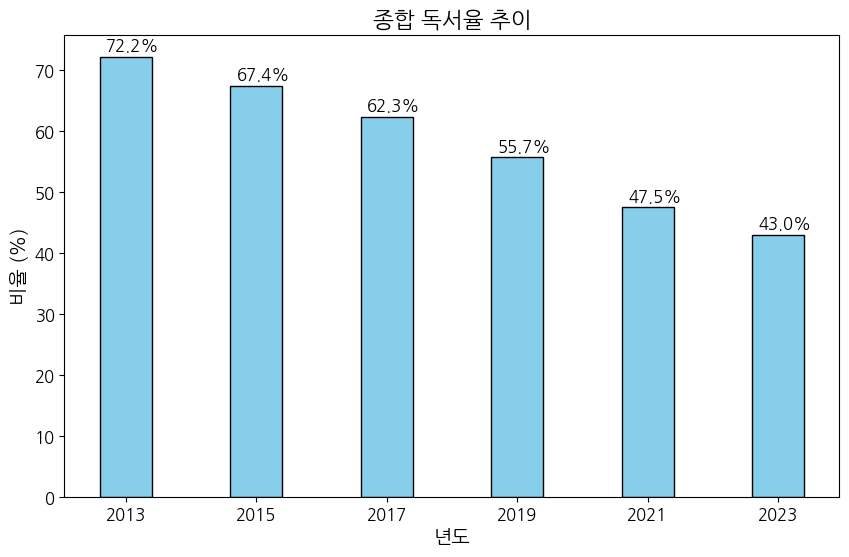

In [ ]:
import matplotlib.pyplot as plt

# 데이터
years = [2013, 2015, 2017, 2019, 2021, 2023]
values = [72.2, 67.4, 62.3, 55.7, 47.5, 43.0]

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(years, values, color='skyblue', edgecolor='black')

# 제목 및 라벨 설정
plt.title('종합 독서율 추이', fontsize=16)
plt.xlabel('년도', fontsize=14)
plt.ylabel('비율 (%)', fontsize=14)
plt.xticks(years, fontsize=12)
plt.yticks(fontsize=12)

# 값 표시
for i, v in enumerate(values):
    plt.text(years[i] - 0.3, v + 1, f"{v}%", fontsize=12)

# 그래프 보이기
plt.show()


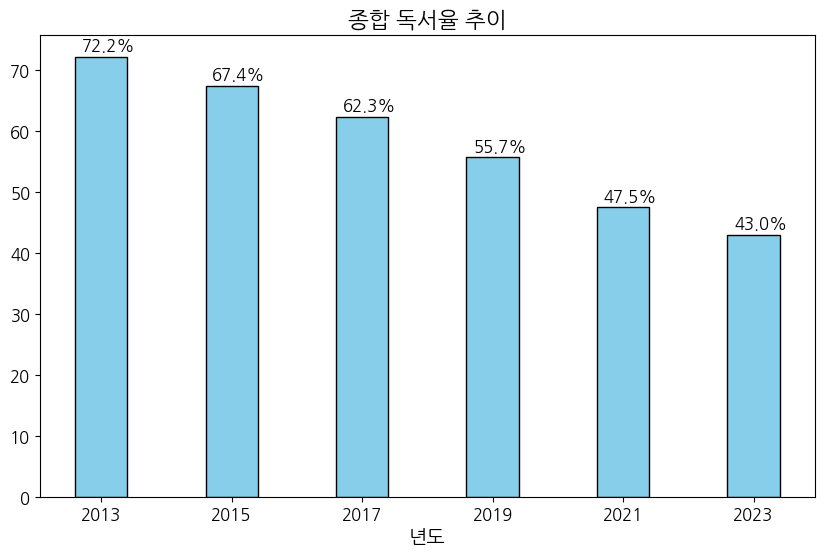

In [ ]:
import matplotlib.pyplot as plt

# 데이터
years = [2013, 2015, 2017, 2019, 2021, 2023]
values = [72.2, 67.4, 62.3, 55.7, 47.5, 43.0]

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(years, values, color='skyblue', edgecolor='black')

# 제목 및 라벨 설정
plt.title('종합 독서율 추이', fontsize=16)
plt.xlabel('년도', fontsize=14)
 # 가로로 표시되도록 설정
plt.xticks(years, fontsize=12)
plt.yticks(fontsize=12)

# 값 표시
for i, v in enumerate(values):
    plt.text(years[i] - 0.3, v + 1, f"{v}%", fontsize=12)

# 그래프 보이기
plt.show()


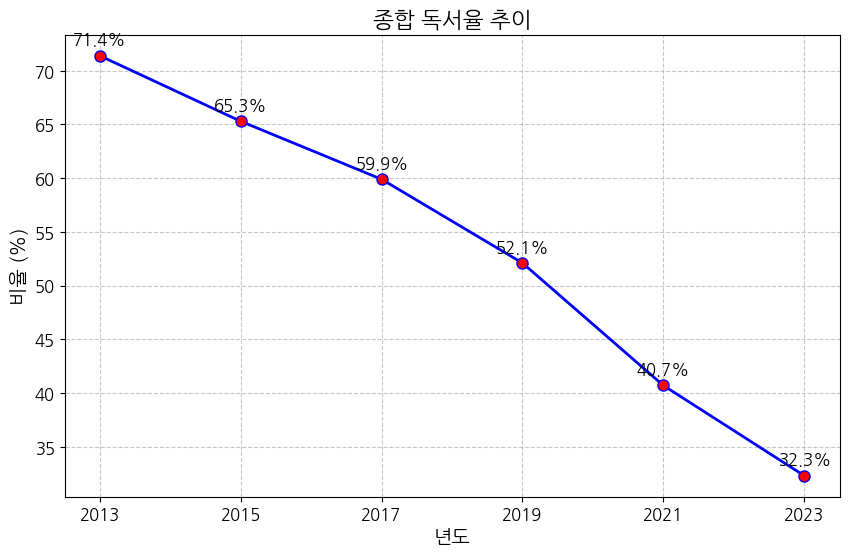

In [ ]:
import matplotlib.pyplot as plt

# 데이터
years = [2013, 2015, 2017, 2019, 2021, 2023]
values = [71.4, 65.3, 59.9, 52.1, 40.7, 32.3]

# 라인플롯 그리기
plt.figure(figsize=(10, 6))
plt.plot(years, values, marker='o', linestyle='-', color='blue', linewidth=2, markersize=8, markerfacecolor='')

# 제목 및 라벨 설정
plt.title('종이책 추이', fontsize=16)
plt.xlabel('년도', fontsize=14)

plt.xticks(years, fontsize=12)
plt.yticks(fontsize=12)

# 값 표시
for i, v in enumerate(values):
    plt.text(years[i], v + 1, f"{v}%", fontsize=12, ha='center')

# 그리드 추가
plt.grid(True, linestyle='--', alpha=0.7)

# 그래프 보이기
plt.show()


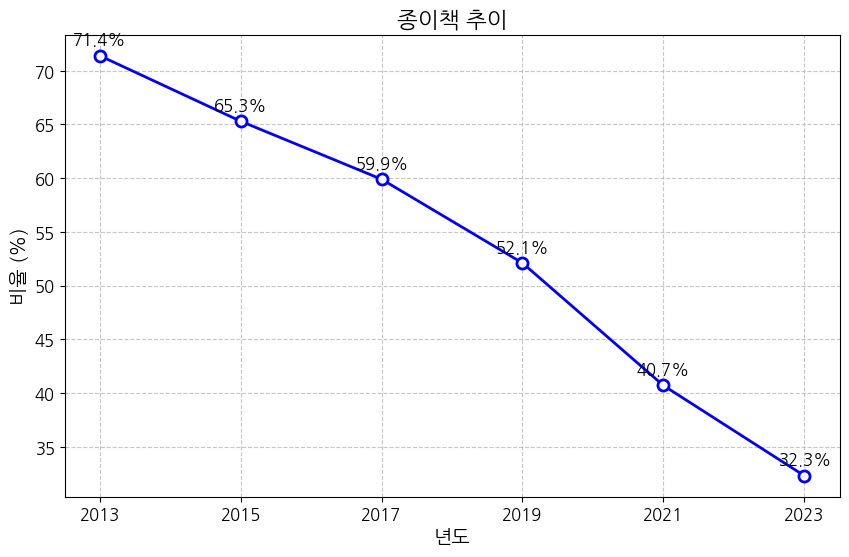

In [ ]:
import matplotlib.pyplot as plt

# 데이터
years = [2013, 2015, 2017, 2019, 2021, 2023]
values = [71.4, 65.3, 59.9, 52.1, 40.7, 32.3]

# 라인플롯 그리기
plt.figure(figsize=(10, 6))
plt.plot(years, values, marker='o', linestyle='-', color='blue', linewidth=2,
         markersize=8, markerfacecolor='white', markeredgewidth=2, markeredgecolor='blue')

# 제목 및 라벨 설정
plt.title('종이책 추이', fontsize=16)
plt.xlabel('년도', fontsize=14)
plt.ylabel('비율 (%)', fontsize=14)
plt.xticks(years, fontsize=12)
plt.yticks(fontsize=12)

# 값 표시
for i, v in enumerate(values):
    plt.text(years[i], v + 1, f"{v}%", fontsize=12, ha='center')

# 그리드 추가
plt.grid(True, linestyle='--', alpha=0.7)

# 그래프 보이기
plt.show()


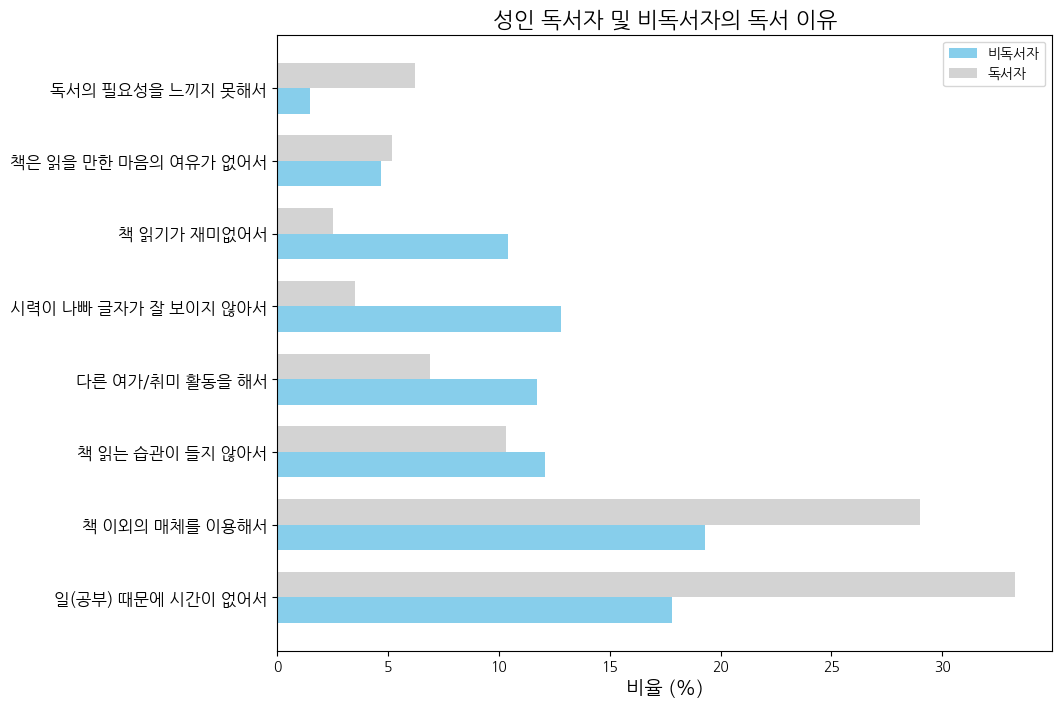

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터
categories = [
    "일(공부) 때문에 시간이 없어서",
    "책 이외의 매체를 이용해서",
    "책 읽는 습관이 들지 않아서",
    "다른 여가/취미 활동을 해서",
    "시력이 나빠 글자가 잘 보이지 않아서",
    "책 읽기가 재미없어서",
    "책은 읽을 만한 마음의 여유가 없어서",
    "독서의 필요성을 느끼지 못해서"
]

readers = [17.8, 19.3, 12.1, 11.7, 12.8, 10.4, 4.7, 1.5]
non_readers = [33.3, 29.0, 10.3, 6.9, 3.5, 2.5, 5.2, 6.2]

# 수평 막대 그래프 그리기
bar_width = 0.35
index = np.arange(len(categories))

plt.figure(figsize=(10, 8))
plt.barh(index, readers, bar_width, color='skyblue', label='비독서자')
plt.barh(index + bar_width, non_readers, bar_width, color='lightgray', label='독서자')

# 라벨과 제목 설정
plt.xlabel('비율 (%)', fontsize=14)
plt.title('성인 독서자 및 비독서자의 독서 이유', fontsize=16)
plt.yticks(index + bar_width / 2, categories, fontsize=12)

# 레전드 추가
plt.legend()

# 그래프 보이기
plt.show()


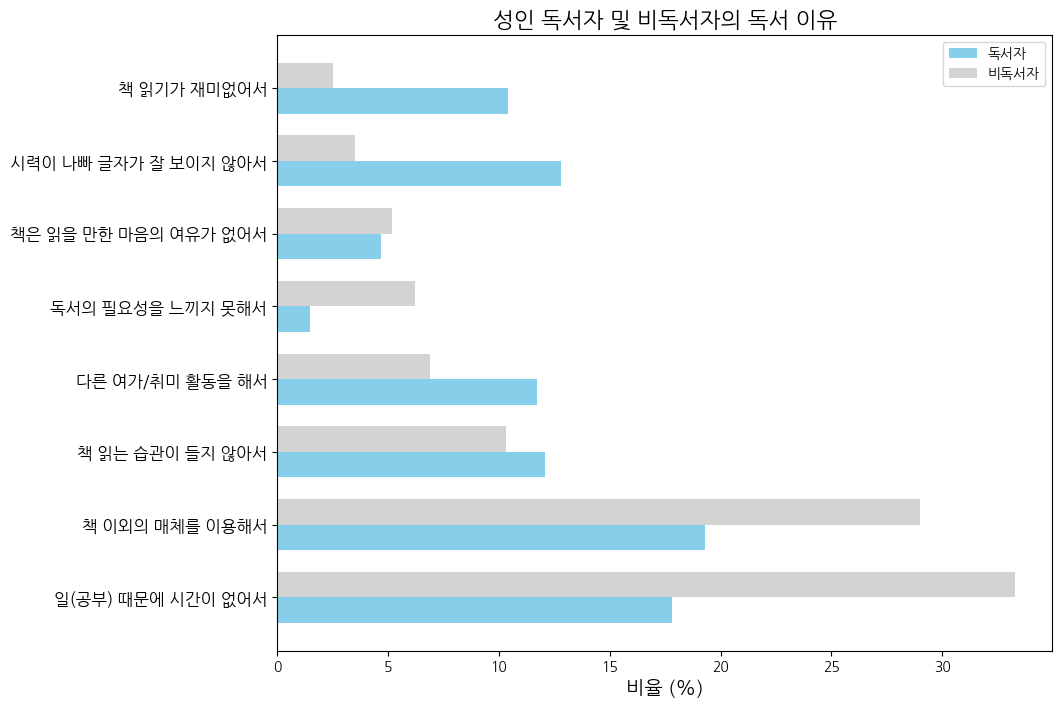

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터
categories = [
    "일(공부) 때문에 시간이 없어서",
    "책 이외의 매체를 이용해서",
    "책 읽는 습관이 들지 않아서",
    "다른 여가/취미 활동을 해서",
    "시력이 나빠 글자가 잘 보이지 않아서",
    "책 읽기가 재미없어서",
    "책은 읽을 만한 마음의 여유가 없어서",
    "독서의 필요성을 느끼지 못해서"
]

readers = [17.8, 19.3, 12.1, 11.7, 12.8, 10.4, 4.7, 1.5]
non_readers = [33.3, 29.0, 10.3, 6.9, 3.5, 2.5, 5.2, 6.2]

# 데이터 정렬
sorted_indices = np.argsort(non_readers)[::-1]  # 비독서자 기준으로 내림차순 정렬

categories = np.array(categories)[sorted_indices]
readers = np.array(readers)[sorted_indices]
non_readers = np.array(non_readers)[sorted_indices]

# 수평 막대 그래프 그리기
bar_width = 0.35
index = np.arange(len(categories))

plt.figure(figsize=(10, 8))
plt.barh(index, readers, bar_width, color='skyblue', label='독서자')
plt.barh(index + bar_width, non_readers, bar_width, color='lightgray', label='비독서자')

# 라벨과 제목 설정
plt.xlabel('비율 (%)', fontsize=14)
plt.title('성인 독서자 및 비독서자의 독서 이유', fontsize=16)
plt.yticks(index + bar_width / 2, categories, fontsize=12)

# 레전드 추가
plt.legend()

# 그래프 보이기
plt.show()


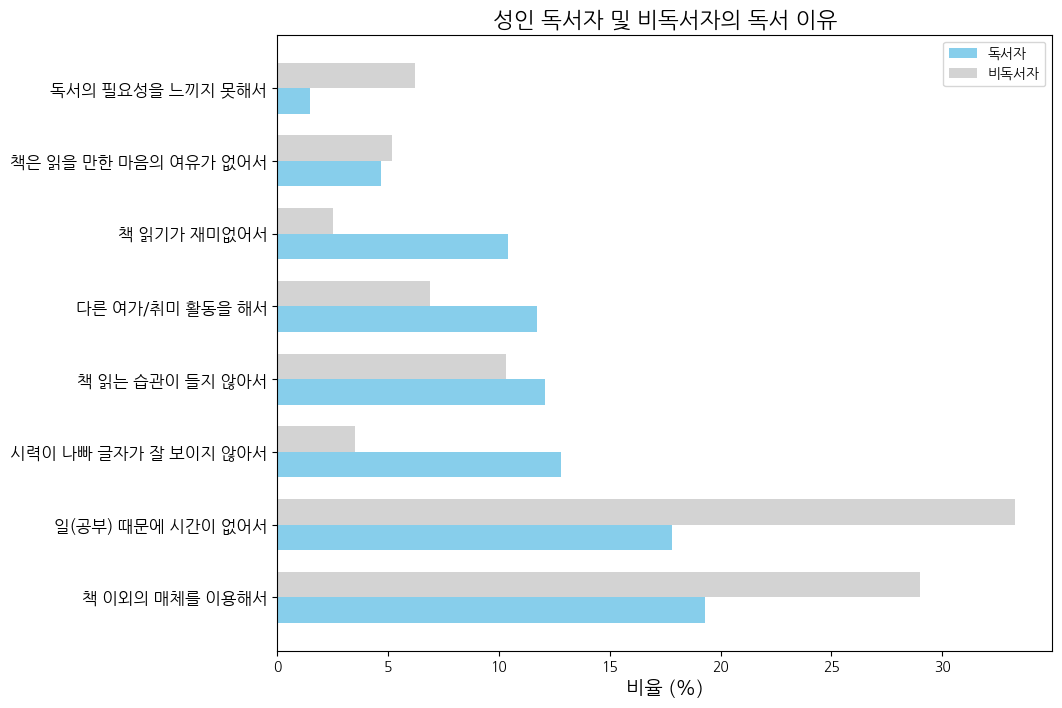

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터
categories = [
    "일(공부) 때문에 시간이 없어서",
    "책 이외의 매체를 이용해서",
    "책 읽는 습관이 들지 않아서",
    "다른 여가/취미 활동을 해서",
    "시력이 나빠 글자가 잘 보이지 않아서",
    "책 읽기가 재미없어서",
    "책은 읽을 만한 마음의 여유가 없어서",
    "독서의 필요성을 느끼지 못해서"
]

readers = [17.8, 19.3, 12.1, 11.7, 12.8, 10.4, 4.7, 1.5]
non_readers = [33.3, 29.0, 10.3, 6.9, 3.5, 2.5, 5.2, 6.2]

# 데이터 정렬 (독서자 기준으로 내림차순 정렬)
sorted_indices = np.argsort(readers)[::-1]

categories = np.array(categories)[sorted_indices]
readers = np.array(readers)[sorted_indices]
non_readers = np.array(non_readers)[sorted_indices]

# 수평 막대 그래프 그리기
bar_width = 0.35
index = np.arange(len(categories))

plt.figure(figsize=(10, 8))
plt.barh(index, readers, bar_width, color='skyblue', label='독서자')
plt.barh(index + bar_width, non_readers, bar_width, color='lightgray', label='비독서자')

# 라벨과 제목 설정
plt.xlabel('비율 (%)', fontsize=14)
plt.title('독서 장애요인', fontsize=16)
plt.yticks(index + bar_width / 2, categories, fontsize=12)

# 레전드 추가
plt.legend()

# 그래프 보이기
plt.show()


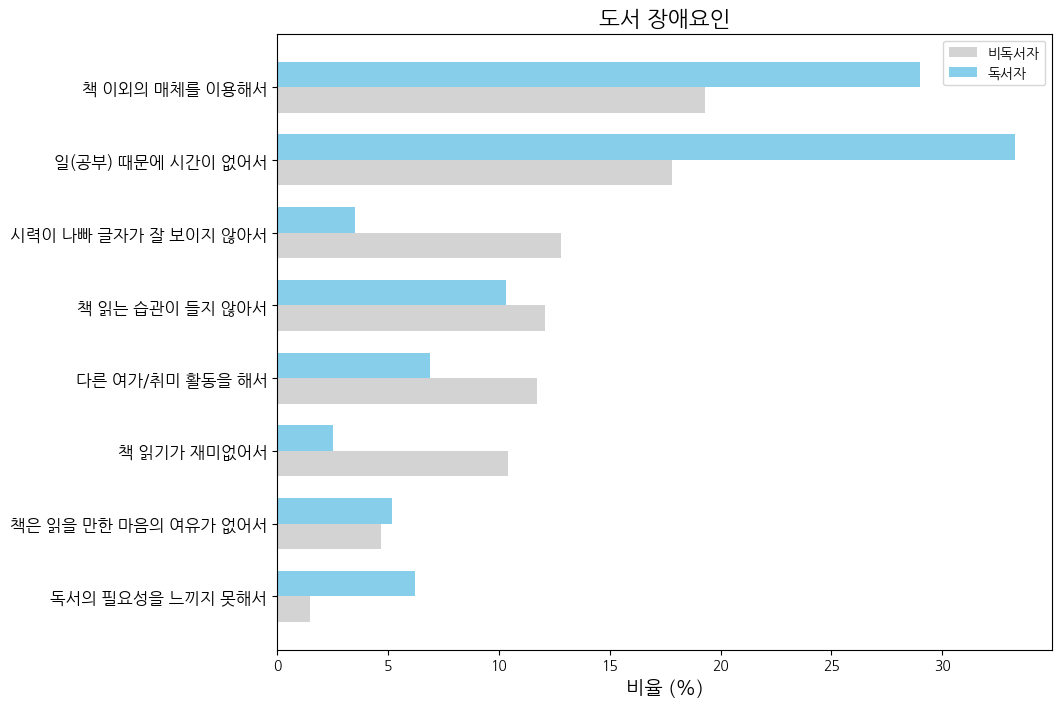

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터
categories = [
    "일(공부) 때문에 시간이 없어서",
    "책 이외의 매체를 이용해서",
    "책 읽는 습관이 들지 않아서",
    "다른 여가/취미 활동을 해서",
    "시력이 나빠 글자가 잘 보이지 않아서",
    "책 읽기가 재미없어서",
    "책은 읽을 만한 마음의 여유가 없어서",
    "독서의 필요성을 느끼지 못해서"
]

readers = [17.8, 19.3, 12.1, 11.7, 12.8, 10.4, 4.7, 1.5]
non_readers = [33.3, 29.0, 10.3, 6.9, 3.5, 2.5, 5.2, 6.2]

# 데이터 정렬 (독서자 기준으로 오름차순 정렬)
sorted_indices = np.argsort(readers)

categories = np.array(categories)[sorted_indices]
readers = np.array(readers)[sorted_indices]
non_readers = np.array(non_readers)[sorted_indices]

# 수평 막대 그래프 그리기
bar_width = 0.35
index = np.arange(len(categories))

plt.figure(figsize=(10, 8))
plt.barh(index, readers, bar_width, color='lightgray', label='비독서자')
plt.barh(index + bar_width, non_readers, bar_width, color='skyblue', label='독서자')

# 라벨과 제목 설정
plt.xlabel('비율 (%)', fontsize=14)
plt.title('도서 장애요인', fontsize=16)
plt.yticks(index + bar_width / 2, categories, fontsize=12)

# 레전드 추가
plt.legend()

# 그래프 보이기
plt.show()


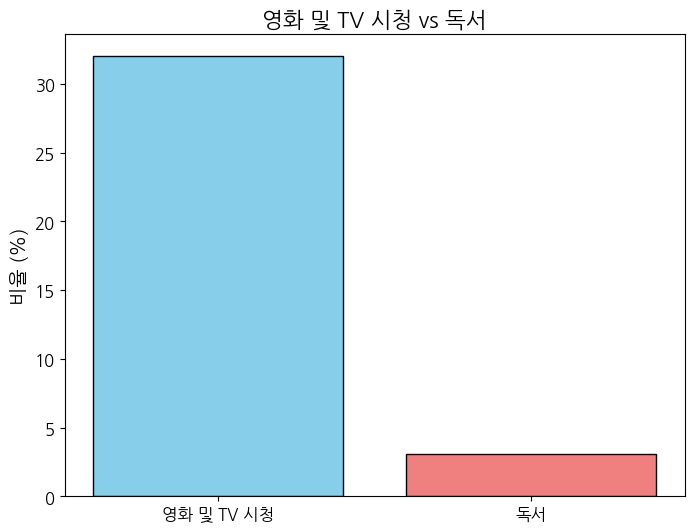

In [ ]:
import matplotlib.pyplot as plt

# 데이터
categories = ['영화 및 TV 시청', '독서']
values = [32.0, 3.1]

# 막대 그래프 그리기
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, values, color=['skyblue', 'lightcoral'], edgecolor='black')



# 제목 및 라벨 설정
plt.title('영화 및 TV 시청 vs 독서', fontsize=16)
plt.ylabel('비율 (%)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 그래프 보이기
plt.show()


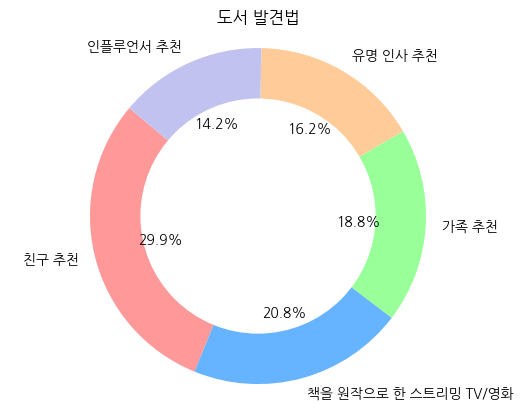

In [ ]:
import matplotlib.pyplot as plt

# 데이터 준비
labels = ['친구 추천', '책을 원작으로 한 스트리밍 TV/영화',
          '가족 추천', '유명 인사 추천', '인플루언서 추천']
sizes = [59, 41, 37, 32, 28]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']

# 도넛 차트 생성
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))

# 가운데 원 표시
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

ax.axis('equal')  # 원을 동그랗게 유지

# 제목 추가
plt.title("도서 발견법")

plt.show()


In [ ]:
%pip install torch-geometric
%pip install torch-scatter torch-sparse torch-cluster torch-spline-conv




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp310-cp310-linux_x86_64.whl size=507267 sha256=084017cd0a88d6f2f269cb685e49841fa8e99bddf252875d9108c9314bccdf05
  Stored in directory: /root/.cache/pip/wheels/92/f1/2b/3b46d54b134259f58c8363568569053248040859b1a145b3ce
  Created wheel for torch-sparse: filename=torch_sparse-0.6.18-cp310-cp310-linux_x86_64.whl size=1092566 sha256=6a90778ec68a61ce75b8328ed270ba85b4709ca

In [ ]:
# 데이터 크기 확인
print(f"Book Embeddings Shape: {book_embeddings.shape}")
print(f"Book Ratings Shape: {book_ratings.shape}")

print(f"Movie Embeddings Shape: {movie_embeddings.shape}")
print(f"Movie Ratings Shape: {movie_ratings.shape}")


Book Embeddings Shape: (1815, 768)
Book Ratings Shape: (1815,)
Movie Embeddings Shape: (14296, 768)
Movie Ratings Shape: (14296,)


In [ ]:
import pandas as pd

# 데이터 로드
book_data = pd.read_excel('/content/drive/MyDrive/도서/cleaned_books_rating_ver.xlsx')

# 평점이 없거나 키워드가 없는 행 제거
book_data = book_data.dropna(subset=['평점', '단어'])

# 결과 확인
print(f"전처리 후 데이터 수: {len(book_data)}")


전처리 후 데이터 수: 1815


In [ ]:
from transformers import BertTokenizer, BertModel
import torch
import pandas as pd

# KoBERT 모델과 토크나이저 로드
tokenizer = BertTokenizer.from_pretrained('monologg/kobert')
model = BertModel.from_pretrained('monologg/kobert')

# 데이터프레임에서 "단어" 열 가져오기
keywords = book_data['단어'].tolist()

# 임베딩을 구하는 함수 정의
def get_kobert_embeddings(text_list):
    embeddings = []
    for text in text_list:
        # KoBERT 토큰화
        inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
        # KoBERT 모델을 통해 임베딩 생성
        with torch.no_grad():  # 불필요한 그래디언트 계산 방지
            outputs = model(**inputs)
        # 배치의 평균 임베딩 벡터 계산
        embedding = outputs.last_hidden_state.mean(dim=1).detach().numpy()
        embeddings.append(embedding.flatten())
    return embeddings

# 키워드의 임베딩 구하기
embeddings = get_kobert_embeddings(keywords)

# 결과를 DataFrame으로 변환
embeddings_df = pd.DataFrame(embeddings)

# 임베딩 데이터프레임 저장 또는 확인
embeddings_df.head()


model.safetensors:   0%|          | 0.00/369M [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
embeddings_df.to_csv('책_임베딩_kobert.csv', index=False)

In [ ]:
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.11.0+cu102.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.11.0+cu102.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-1.11.0+cu102.html
!pip install torch-spline-conv -f https://data.pyg.org/whl/torch-1.11.0+cu102.html
!pip install torch-geometric


Looking in links: https://data.pyg.org/whl/torch-1.11.0+cu102.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp310-cp310-linux_x86_64.whl size=507267 sha256=2f4dd76f563b99fbfcd8885e6fb8c7e1357f9c2623ded35c9a4e63a371dedf39
  Stored in directory: /root/.cache/pip/wheels/92/f1/2b/3b46d54b134259f58c8363568569053248040859b1a145b3ce
Successfully built torch-scatter
Looking in links: https://data.pyg.org/whl/torch-1.11.0+cu102.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-sparse: filename=torch_sparse-0.6.18-cp310-cp310-linux_x86_64.whl size=1092566 sha256=5316a3daa4cf87c643a48d2476a400c8d30de30a392b8265788f5c4bb1b3b463
  Stored in directory: /root/.cache/pip/wheels/c9/dd/0f/a6a16f9f3b0236733d257b4b4ea91b548b984a341ed3b8f38c
Successfully built 

In [ ]:
import pandas as pd
import torch

# 데이터 로드
book_embeddings = pd.read_csv('/content/drive/MyDrive/도서/책_임베딩_kobert (2).csv')
movie_embeddings = pd.read_csv('/content/drive/MyDrive/도서/영화_임베딩_kobert_최종.csv')
book_data = pd.read_excel('/content/drive/MyDrive/도서/cleaned_books_rating_ver.xlsx')
movie_keyword_data = pd.read_csv('/content/drive/MyDrive/도서/영화 키워드 최종본_kobert_240818.csv')

# 필요한 열 추출
book_ratings = book_data['평점'].values
movie_ratings = movie_keyword_data['평점'].values

# 평점 데이터를 임베딩 데이터에 추가
book_ratings_tensor = torch.tensor(book_ratings, dtype=torch.float).unsqueeze(1)
movie_ratings_tensor = torch.tensor(movie_ratings, dtype=torch.float).unsqueeze(1)

# 임베딩 데이터를 텐서로 변환
book_embeddings_tensor = torch.tensor(book_embeddings.values, dtype=torch.float)
movie_embeddings_tensor = torch.tensor(movie_embeddings.values, dtype=torch.float)

# 평점 데이터를 임베딩에 추가
book_embeddings_with_ratings = torch.cat([book_embeddings_tensor, book_ratings_tensor], dim=1)
movie_embeddings_with_ratings = torch.cat([movie_embeddings_tensor, movie_ratings_tensor], dim=1)

In [ ]:
# 노드 연결 설정 (임의의 연결)
edges = []
for i in range(len(movie_embeddings_with_ratings)):
    for j in range(len(book_embeddings_with_ratings)):
        edges.append([i, len(movie_embeddings_with_ratings) + j])

# 엣지를 텐서로 변환
edges = torch.tensor(edges).t().contiguous()

# 영화와 책 임베딩 결합 (영화 노드 + 책 노드)
x = torch.cat([movie_embeddings_with_ratings, book_embeddings_with_ratings], dim=0)

# PyTorch Geometric Data 객체 생성
from torch_geometric.data import Data
data = Data(x=x, edge_index=edges)

In [ ]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split

# 데이터 로드
book_embeddings = pd.read_csv('/content/drive/MyDrive/도서/책_임베딩_kobert (2).csv')
movie_embeddings = pd.read_csv('/content/drive/MyDrive/도서/영화_임베딩_kobert_최종.csv')
book_data = pd.read_excel('/content/drive/MyDrive/도서/cleaned_books_rating_ver.xlsx')
movie_keyword_data = pd.read_csv('/content/drive/MyDrive/도서/영화 키워드 최종본_kobert_240818.csv')

# 필요한 열 추출
book_ratings = book_data['평점'].values
movie_ratings = movie_keyword_data['평점'].values

# 평점 데이터를 임베딩 데이터에 추가
book_ratings_tensor = torch.tensor(book_ratings, dtype=torch.float).unsqueeze(1)
movie_ratings_tensor = torch.tensor(movie_ratings, dtype=torch.float).unsqueeze(1)

# 임베딩 데이터를 텐서로 변환
book_embeddings_tensor = torch.tensor(book_embeddings.values, dtype=torch.float)
movie_embeddings_tensor = torch.tensor(movie_embeddings.values, dtype=torch.float)

# 평점 데이터를 임베딩에 추가
book_embeddings_with_ratings = torch.cat([book_embeddings_tensor, book_ratings_tensor], dim=1)
movie_embeddings_with_ratings = torch.cat([movie_embeddings_tensor, movie_ratings_tensor], dim=1)


In [ ]:
# 트레인/테스트 데이터셋 분할
train_movie_embeddings, test_movie_embeddings = train_test_split(movie_embeddings_with_ratings, test_size=0.2, random_state=42)
train_book_embeddings, test_book_embeddings = train_test_split(book_embeddings_with_ratings, test_size=0.2, random_state=42)

# 트레인 데이터 엣지 연결 설정
edges_train = []
for i in range(len(train_movie_embeddings)):
    for j in range(len(train_book_embeddings)):
        edges_train.append([i, len(train_movie_embeddings) + j])

edges_train = torch.tensor(edges_train).t().contiguous()

# 트레인 데이터 임베딩 결합
x_train = torch.cat([train_movie_embeddings, train_book_embeddings], dim=0)


In [ ]:
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv

class GNN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

# 모델 초기화
input_dim = x_train.size(1)
hidden_dim = 64
output_dim = 32
model = GNN(input_dim, hidden_dim, output_dim)

# PyTorch Geometric Data 객체 생성 (트레인 데이터)
data_train = Data(x=x_train, edge_index=edges_train)

# 모델 학습
model.train()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
for epoch in range(50):  # 예시로 100번의 에폭 진행
    optimizer.zero_grad()
    output = model(data_train)
    target = data_train.x[:, :output.size(1)]  # 타겟은 동일한 크기의 임베딩
    loss = F.mse_loss(output, target)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")


Epoch 0, Loss: 218.7826690673828
Epoch 10, Loss: 0.2589242458343506
Epoch 20, Loss: 0.24986915290355682
Epoch 30, Loss: 0.23847590386867523
Epoch 40, Loss: 0.2257567048072815


In [ ]:
import pandas as pd
import torch
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
# 테스트 데이터 엣지 연결 설정
edges_test = []
for i in range(len(test_movie_embeddings)):
    for j in range(len(test_book_embeddings)):
        edges_test.append([i, len(test_movie_embeddings) + j])

edges_test = torch.tensor(edges_test).t().contiguous()

# 테스트 데이터 임베딩 결합
x_test = torch.cat([test_movie_embeddings, test_book_embeddings], dim=0)
data_test = Data(x=x_test, edge_index=edges_test)

# 모델 평가
model.eval()
with torch.no_grad():
    test_output = model(data_test)

# 코사인 유사도 계산
movie_output_test = test_output[:len(test_movie_embeddings)]
book_output_test = test_output[len(test_movie_embeddings):]
cosine_similarities_test = cosine_similarity(movie_output_test, book_output_test)

# 각 영화에 대해 가장 유사한 책 찾기
recommended_books = []
for movie_idx in range(len(test_movie_embeddings)):
    most_similar_book_idx = np.argmax(cosine_similarities_test[movie_idx])
    movie_title = movie_keyword_data.iloc[movie_idx]['제목']  # 영화 제목 (실제 열 이름으로 변경)
    book_title = book_data.iloc[most_similar_book_idx]['도서명']  # 책 제목 (실제 열 이름으로 변경)
    recommended_books.append([movie_title, book_title])

# 추천 결과를 데이터프레임으로 저장
recommendations_df = pd.DataFrame(recommended_books, columns=['영화 제목', '추천 도서'])

# 결과를 CSV 파일로 저장
recommendations_df.to_csv('movie_book_recommendations.csv', index=False)

print("추천 결과가 'movie_book_recommendations.csv' 파일로 저장되었습니다.")


추천 결과가 'movie_book_recommendations.csv' 파일로 저장되었습니다.


In [ ]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split

# 데이터 로드
book_embeddings = pd.read_csv('/content/drive/MyDrive/도서/책_임베딩_kobert (2).csv')
movie_embeddings = pd.read_csv('/content/drive/MyDrive/도서/영화_임베딩_kobert_최종.csv')
book_data = pd.read_excel('/content/drive/MyDrive/도서/cleaned_books_rating_ver.xlsx')
movie_keyword_data = pd.read_csv('/content/drive/MyDrive/도서/영화 키워드 최종본_kobert_240818.csv')

# 필요한 열 추출
book_ratings = book_data['평점'].values
movie_ratings = movie_keyword_data['평점'].values

# 평점 데이터를 임베딩 데이터에 추가
book_ratings_tensor = torch.tensor(book_ratings, dtype=torch.float).unsqueeze(1)
movie_ratings_tensor = torch.tensor(movie_ratings, dtype=torch.float).unsqueeze(1)

# 임베딩 데이터를 텐서로 변환
book_embeddings_tensor = torch.tensor(book_embeddings.values, dtype=torch.float)
movie_embeddings_tensor = torch.tensor(movie_embeddings.values, dtype=torch.float)

# 평점 데이터를 임베딩에 추가
book_embeddings_with_ratings = torch.cat([book_embeddings_tensor, book_ratings_tensor], dim=1)
movie_embeddings_with_ratings = torch.cat([movie_embeddings_tensor, movie_ratings_tensor], dim=1)

# 영화와 책 데이터를 각각 트레인/테스트 데이터셋으로 분할
train_movie_embeddings, test_movie_embeddings = train_test_split(movie_embeddings_with_ratings, test_size=0.2, random_state=42)
train_book_embeddings, test_book_embeddings = train_test_split(book_embeddings_with_ratings, test_size=0.2, random_state=42)

# 엣지 연결 설정 (트레인 데이터)
edges_train = []
for i in range(len(train_movie_embeddings)):
    for j in range(len(train_book_embeddings)):
        edges_train.append([i, len(train_movie_embeddings) + j])

edges_train = torch.tensor(edges_train).t().contiguous()

# 영화와 책 임베딩 결합 (트레인 데이터)
x_train = torch.cat([train_movie_embeddings, train_book_embeddings], dim=0)


In [ ]:
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv

class GNN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

# 모델 초기화
input_dim = x_train.size(1)
hidden_dim = 64
output_dim = 32
model = GNN(input_dim, hidden_dim, output_dim)

# PyTorch Geometric Data 객체 생성 (트레인 데이터)
data_train = Data(x=x_train, edge_index=edges_train)

# 모델 학습 (수정)
model.train()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
for epoch in range(100):  # 예시로 100번의 에폭 진행
    optimizer.zero_grad()
    output = model(data_train)

    # 출력 크기와 동일한 타겟 생성 (예시: 데이터셋의 일부 특성만 사용)
    target = data_train.x[:, :output.size(1)]

    loss = F.mse_loss(output, target)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")




Epoch 0, Loss: 151.07574462890625
Epoch 10, Loss: 0.25331375002861023
Epoch 20, Loss: 0.23769786953926086
Epoch 30, Loss: 0.2195018231868744
Epoch 40, Loss: 0.2009318470954895
Epoch 50, Loss: 0.18300576508045197
Epoch 60, Loss: 0.16618245840072632
Epoch 70, Loss: 0.15063725411891937
Epoch 80, Loss: 0.1364016830921173
Epoch 90, Loss: 0.12343630194664001


In [ ]:
import numpy as np
# 엣지 연결 설정 (테스트 데이터)
edges_test = []
for i in range(len(test_movie_embeddings)):
    for j in range(len(test_book_embeddings)):
        edges_test.append([i, len(test_movie_embeddings) + j])

edges_test = torch.tensor(edges_test).t().contiguous()

# 영화와 책 임베딩 결합 (테스트 데이터)
x_test = torch.cat([test_movie_embeddings, test_book_embeddings], dim=0)
data_test = Data(x=x_test, edge_index=edges_test)

# 모델 평가
model.eval()
with torch.no_grad():
    test_output = model(data_test)

# 학습된 임베딩으로 코사인 유사도 계산 (테스트 데이터)
from sklearn.metrics.pairwise import cosine_similarity

movie_output_test = test_output[:len(test_movie_embeddings)]
book_output_test = test_output[len(test_movie_embeddings):]
cosine_similarities_test = cosine_similarity(movie_output_test, book_output_test)

# 가장 높은 유사도 찾기 (테스트 데이터)
max_sim_index_test = np.unravel_index(np.argmax(cosine_similarities_test, axis=None), cosine_similarities_test.shape)
max_similarity_test = cosine_similarities_test[max_sim_index_test]

# 결과 출력 (테스트 데이터에서 가장 유사한 영화와 책)
movie_index_test, book_index_test = max_sim_index_test
print(f"테스트 데이터에서 가장 높은 유사도: {max_similarity_test}")
print(f"영화 인덱스: {movie_index_test}, 책 인덱스: {book_index_test}")



테스트 데이터에서 가장 높은 유사도: 1.0000001192092896
영화 인덱스: 0, 책 인덱스: 0


In [ ]:
import pandas as pd
import torch
from sklearn.metrics.pairwise import cosine_similarity

# 엣지 연결 설정 (테스트 데이터)
edges_test = []
for i in range(len(test_movie_embeddings)):
    for j in range(len(test_book_embeddings)):
        edges_test.append([i, len(test_movie_embeddings) + j])

edges_test = torch.tensor(edges_test).t().contiguous()

# 영화와 책 임베딩 결합 (테스트 데이터)
x_test = torch.cat([test_movie_embeddings, test_book_embeddings], dim=0)
data_test = Data(x=x_test, edge_index=edges_test)

# 모델 평가
model.eval()
with torch.no_grad():
    test_output = model(data_test)

# 학습된 임베딩으로 코사인 유사도 계산 (테스트 데이터)
movie_output_test = test_output[:len(test_movie_embeddings)]
book_output_test = test_output[len(test_movie_embeddings):]
cosine_similarities_test = cosine_similarity(movie_output_test, book_output_test)

# 각 영화에 대해 가장 유사한 책 찾기
recommended_books = []
for movie_idx in range(len(test_movie_embeddings)):
    # 해당 영화에 대해 가장 유사한 책의 인덱스 찾기
    most_similar_book_idx = np.argmax(cosine_similarities_test[movie_idx])
    movie_title = movie_keyword_data.iloc[movie_idx]['영화제목']  # 영화 제목 (실제 열 이름으로 변경)
    book_title = book_data.iloc[most_similar_book_idx]['도서명']  # 책 제목 (실제 열 이름으로 변경)
    recommended_books.append([movie_title, book_title])

# 추천 결과를 데이터프레임으로 저장
recommendations_df = pd.DataFrame(recommended_books, columns=['영화 제목', '추천 도서'])

# 결과를 CSV 파일로 저장
recommendations_df.to_csv('movie_book_recommendations.csv', index=False)

print("추천 결과가 'movie_book_recommendations.csv' 파일로 저장되었습니다.")


KeyError: '영화제목'

In [ ]:
import pandas as pd
import torch
from sklearn.metrics.pairwise import cosine_similarity

# 데이터 로드
movie_data = pd.read_csv('/content/drive/MyDrive/도서/영화 키워드 최종본_kobert_240818.csv')
book_data = pd.read_excel('/content/drive/MyDrive/도서/cleaned_books_rating_ver.xlsx')

# 영화와 책 제목 추출
movie_titles = movie_data['제목']  # 실제 열 이름에 맞게 변경
book_titles = book_data['도서명']  # 실제 열 이름에 맞게 변경

# 영화와 책 임베딩 데이터 로드 (이전에 생성된 데이터를 사용)
test_movie_embeddings = torch.tensor(movie_embeddings.values, dtype=torch.float)
test_book_embeddings = torch.tensor(book_embeddings.values, dtype=torch.float)


In [ ]:
# 엣지 연결 설정 (테스트 데이터)
edges_test = []
for i in range(len(test_movie_embeddings)):
    for j in range(len(test_book_embeddings)):
        edges_test.append([i, len(test_movie_embeddings) + j])

edges_test = torch.tensor(edges_test).t().contiguous()

# 영화와 책 임베딩 결합 (테스트 데이터)
x_test = torch.cat([test_movie_embeddings, test_book_embeddings], dim=0)
data_test = Data(x=x_test, edge_index=edges_test)

# 모델 평가
model.eval()
with torch.no_grad():
    test_output = model(data_test)

# 학습된 임베딩으로 코사인 유사도 계산 (테스트 데이터)
movie_output_test = test_output[:len(test_movie_embeddings)]
book_output_test = test_output[len(test_movie_embeddings):]
cosine_similarities_test = cosine_similarity(movie_output_test, book_output_test)

# 각 영화에 대해 가장 유사한 책 찾기
recommended_books = []
for movie_idx in range(len(test_movie_embeddings)):
    # 해당 영화에 대해 가장 유사한 책의 인덱스 찾기
    most_similar_book_idx = np.argmax(cosine_similarities_test[movie_idx])
    movie_title = movie_titles.iloc[movie_idx]
    book_title = book_titles.iloc[most_similar_book_idx]
    recommended_books.append([movie_title, book_title])

# 추천 결과를 데이터프레임으로 저장
recommendations_df = pd.DataFrame(recommended_books, columns=['영화 제목', '추천 도서'])

# 결과를 CSV 파일로 저장
recommendations_df.to_csv('movie_book_recommendations.csv', index=False)

print("추천 결과가 'movie_book_recommendations.csv' 파일로 저장되었습니다.")


RuntimeError: mat1 and mat2 shapes cannot be multiplied (16111x768 and 769x64)

#GNN

In [ ]:
import pandas as pd
import torch

# 데이터 로드
book_embeddings = pd.read_csv('/content/drive/MyDrive/도서/책_임베딩_kobert (2).csv')
movie_embeddings = pd.read_csv('/content/drive/MyDrive/도서/영화_임베딩_kobert_최종.csv')
book_data = pd.read_excel('/content/drive/MyDrive/도서/cleaned_books_rating_ver.xlsx')
movie_keyword_data = pd.read_csv('/content/drive/MyDrive/도서/영화 키워드 최종본_kobert_240818.csv')

# 필요한 열 추출
book_ratings = book_data['평점'].values
movie_ratings = movie_keyword_data['평점'].values

# 평점 데이터를 임베딩 데이터에 추가
book_ratings_tensor = torch.tensor(book_ratings, dtype=torch.float).unsqueeze(1)
movie_ratings_tensor = torch.tensor(movie_ratings, dtype=torch.float).unsqueeze(1)

# 임베딩 데이터를 텐서로 변환
book_embeddings_tensor = torch.tensor(book_embeddings.values, dtype=torch.float)
movie_embeddings_tensor = torch.tensor(movie_embeddings.values, dtype=torch.float)

# 평점 데이터를 임베딩에 추가
book_embeddings_with_ratings = torch.cat([book_embeddings_tensor, book_ratings_tensor], dim=1)
movie_embeddings_with_ratings = torch.cat([movie_embeddings_tensor, movie_ratings_tensor], dim=1)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/도서/책_임베딩_kobert (2).csv'

In [ ]:
# 노드 연결 설정 (임의의 연결)
edges = []
for i in range(len(movie_embeddings_with_ratings)):
    for j in range(len(book_embeddings_with_ratings)):
        edges.append([i, len(movie_embeddings_with_ratings) + j])

# 엣지를 텐서로 변환
edges = torch.tensor(edges).t().contiguous()

# 영화와 책 임베딩 결합 (영화 노드 + 책 노드)
x = torch.cat([movie_embeddings_with_ratings, book_embeddings_with_ratings], dim=0)

# PyTorch Geometric Data 객체 생성
from torch_geometric.data import Data
data = Data(x=x, edge_index=edges)


In [ ]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

# GNN 모델 정의
class GNN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

# 데이터 크기 줄이기: 임의로 첫 500개 항목만 사용
subset_size = 500
movie_embeddings_with_ratings = movie_embeddings_with_ratings[:subset_size]
book_embeddings_with_ratings = book_embeddings_with_ratings[:subset_size]

# 노드 연결 설정 (임의의 연결)
edges = []
for i in range(len(movie_embeddings_with_ratings)):
    for j in range(len(book_embeddings_with_ratings)):
        edges.append([i, len(movie_embeddings_with_ratings) + j])

# 엣지를 텐서로 변환
edges = torch.tensor(edges).t().contiguous()

# 영화와 책 임베딩 결합 (영화 노드 + 책 노드)
x = torch.cat([movie_embeddings_with_ratings, book_embeddings_with_ratings], dim=0)

# PyTorch Geometric Data 객체 생성
from torch_geometric.data import Data
data = Data(x=x, edge_index=edges)

# 모델 초기화: 작은 크기의 히든 레이어 및 출력 레이어 사용
input_dim = x.size(1)
hidden_dim = 32  # 줄인 히든 레이어 크기
output_dim = 16  # 줄인 출력 레이어 크기
model = GNN(input_dim, hidden_dim, output_dim)

# 모델 학습
model.eval()
with torch.no_grad():
    output = model(data)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# 학습된 임베딩으로 코사인 유사도 계산
movie_output = output[:len(movie_embeddings_tensor)]
book_output = output[len(movie_embeddings_tensor):]
cosine_similarities = cosine_similarity(movie_output, book_output)

# 가장 높은 유사도 찾기
max_sim_index = np.unravel_index(np.argmax(cosine_similarities, axis=None), cosine_similarities.shape)
max_similarity = cosine_similarities[max_sim_index]

# 결과 출력
movie_index, book_index = max_sim_index
print(f"가장 높은 유사도: {max_similarity}")
print(f"영화 인덱스: {movie_index}, 책 인덱스: {book_index}")
